### Proje

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import warnings
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
warnings.filterwarnings('ignore')

### Projenin Amacı:

Ev fiyatlarını en kesin şekilde nasıl tahmin edebiliriz? Elimizde ev ames city içindeki 1460 eve ait evin bir çok özelliğini barındıran bir veri kümesi mevcut. Yine aynı boyutlarda, sadece fiyat bilgisini içermeyen bir de test kümesi mevcut. Bu verilerle çalışarak, önce keşifsel veri analizi yapacağız. Daha sonra modeli eğitim kümesi ile eğiterek, test kümesindeki evlerin fiyatlarını tahmin edeceğiz.

### Veriye Genel Bakış:

In [2]:
train_1 = pd.read_csv('train.csv') #daha sonra kullanmak üzere 

In [3]:
train_f = pd.read_csv('train.csv')
train_f.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_f = pd.read_csv('test.csv')
test_f.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Test ve Train kümelerini birleştirelim:

In [6]:
train_f.drop(['Id'], axis=1, inplace=True)
test_f.drop(['Id'], axis=1, inplace=True)

In [7]:
train_f= train_f.drop(['SalePrice'], axis=1)
features = pd.concat([train_f, test_f]).reset_index(drop=True)

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

### Kayıp verilerin analizi

In [9]:
missing_data = pd.DataFrame(features.isnull().sum().reset_index())
missing_data.columns = ['index', 'missingcount']
missing_data = missing_data[missing_data['missingcount']>0]
missing_data['missingper'] = (missing_data['missingcount']/features.shape[0])*100
print('Missing Data \n', missing_data)

Missing Data 
            index  missingcount  missingper
1       MSZoning             4    0.137033
2    LotFrontage           486   16.649538
5          Alley          2721   93.216855
8      Utilities             2    0.068517
22   Exterior1st             1    0.034258
23   Exterior2nd             1    0.034258
24    MasVnrType            24    0.822199
25    MasVnrArea            23    0.787941
29      BsmtQual            81    2.774923
30      BsmtCond            82    2.809181
31  BsmtExposure            82    2.809181
32  BsmtFinType1            79    2.706406
33    BsmtFinSF1             1    0.034258
34  BsmtFinType2            80    2.740665
35    BsmtFinSF2             1    0.034258
36     BsmtUnfSF             1    0.034258
37   TotalBsmtSF             1    0.034258
41    Electrical             1    0.034258
46  BsmtFullBath             2    0.068517
47  BsmtHalfBath             2    0.068517
52   KitchenQual             1    0.034258
54    Functional             2    0.068

Alley, PoolQC, Fence, MiscFeature (çok fazla kayıp değer var, bunları çıkartalım.)

In [10]:
features = features.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

### Kayıp değerleri düzenlemek

* LotFrontage

In [11]:
features.LotFrontage = features.LotFrontage.fillna(features.LotFrontage.mode())

* MasVnrType

In [12]:
features.MasVnrType = features.MasVnrType.fillna(features.MasVnrType.mode())

* MasVnrArea

In [13]:
print('Ortalama MasVnrArea:', features.MasVnrArea.mean(), '\n -------')
print('MasVnrType = None ise Area ortalama:', features[features['MasVnrType'] == 'None']['MasVnrArea'].mean())

Ortalama MasVnrArea: 102.20131215469613 
 -------
MasVnrType = None ise Area ortalama: 0.7072330654420207


MasVnrType None ise Area da sıfır oluyor.

In [14]:
features.MasVnrArea = features.MasVnrArea.fillna(0)

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [15]:
print(features.BsmtQual.value_counts())
print(features.BsmtCond.value_counts())
print(features.BsmtFinType1.value_counts())

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64


In [16]:
print(features[features['BsmtFinType2'].isnull()|(features['BsmtExposure'].isnull())]
      [['TotalBsmtSF','BsmtFinType2','BsmtExposure']])

      TotalBsmtSF BsmtFinType2 BsmtExposure
17            0.0          NaN          NaN
39            0.0          NaN          NaN
90            0.0          NaN          NaN
102           0.0          NaN          NaN
156           0.0          NaN          NaN
182           0.0          NaN          NaN
259           0.0          NaN          NaN
332        3206.0          NaN           No
342           0.0          NaN          NaN
362           0.0          NaN          NaN
371           0.0          NaN          NaN
392           0.0          NaN          NaN
520           0.0          NaN          NaN
532           0.0          NaN          NaN
533           0.0          NaN          NaN
553           0.0          NaN          NaN
646           0.0          NaN          NaN
705           0.0          NaN          NaN
736           0.0          NaN          NaN
749           0.0          NaN          NaN
778           0.0          NaN          NaN
868           0.0          NaN  

In [17]:
print(features.BsmtFinType2.value_counts())

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [18]:
print(features.BsmtExposure.value_counts())

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64


Sadece bu iki satırdakileri modla değiştirdim. kalanlarda zaten basement yok!!

In [19]:
features.iloc[332, features.columns.get_loc('BsmtFinType2')] = features['BsmtFinType2'].mode()[0]
features.iloc[948, features.columns.get_loc('BsmtExposure')] = features['BsmtExposure'].mode()[0]

In [20]:
features.BsmtFinType2 = features.BsmtFinType2.fillna('None')
features.BsmtExposure = features.BsmtExposure.fillna('No')

In [21]:
features[['BsmtFinType1', 'BsmtCond', 'BsmtQual']].isnull().sum()

BsmtFinType1    79
BsmtCond        82
BsmtQual        81
dtype: int64

In [22]:
print(features[(features['BsmtFinType1'].isnull())|
                 (features['BsmtCond'].isnull())|
                 (features['BsmtQual'].isnull())]
                 [['TotalBsmtSF','BsmtFinType1', 'BsmtCond','BsmtQual']])

      TotalBsmtSF BsmtFinType1 BsmtCond BsmtQual
17            0.0          NaN      NaN      NaN
39            0.0          NaN      NaN      NaN
90            0.0          NaN      NaN      NaN
102           0.0          NaN      NaN      NaN
156           0.0          NaN      NaN      NaN
182           0.0          NaN      NaN      NaN
259           0.0          NaN      NaN      NaN
342           0.0          NaN      NaN      NaN
362           0.0          NaN      NaN      NaN
371           0.0          NaN      NaN      NaN
392           0.0          NaN      NaN      NaN
520           0.0          NaN      NaN      NaN
532           0.0          NaN      NaN      NaN
533           0.0          NaN      NaN      NaN
553           0.0          NaN      NaN      NaN
646           0.0          NaN      NaN      NaN
705           0.0          NaN      NaN      NaN
736           0.0          NaN      NaN      NaN
749           0.0          NaN      NaN      NaN
778           0.0   

Buradan NAN larda basement olmadığını çıkarıyoruz.

In [23]:
features[['BsmtFinType1', 'BsmtCond','BsmtQual']] = features[['BsmtFinType1', 'BsmtCond','BsmtQual']].fillna('None')

* Electrical 1 

In [24]:
features.Electrical = features.Electrical.fillna(features.Electrical.mode())

* FirePlaceQU - FirePlaces

In [25]:
print('Nan sayısı:', features.FireplaceQu.isnull().sum())
print('FirePlace olmayan ev sayısı:', features[features['Fireplaces']==0]['Fireplaces'].shape[0])

Nan sayısı: 1420
FirePlace olmayan ev sayısı: 1420


In [26]:
features.FireplaceQu = features.FireplaceQu.fillna('None')

In [27]:
garage = features[['GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]
print('Nan değer sayısı', garage.isnull().sum())

Nan değer sayısı GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64


In [28]:
print(features[(features['GarageYrBlt'].isnull())|
                 (features['GarageType'].isnull())|
                 (features['GarageQual'].isnull())|
                 (features['GarageCond'].isnull())|
                 (features['GarageFinish'].isnull())]
                 [['GarageCars','GarageYrBlt','GarageType','GarageQual','GarageCond','GarageFinish']])

      GarageCars  GarageYrBlt GarageType GarageQual GarageCond GarageFinish
39           0.0          NaN        NaN        NaN        NaN          NaN
48           0.0          NaN        NaN        NaN        NaN          NaN
78           0.0          NaN        NaN        NaN        NaN          NaN
88           0.0          NaN        NaN        NaN        NaN          NaN
89           0.0          NaN        NaN        NaN        NaN          NaN
99           0.0          NaN        NaN        NaN        NaN          NaN
108          0.0          NaN        NaN        NaN        NaN          NaN
125          0.0          NaN        NaN        NaN        NaN          NaN
127          0.0          NaN        NaN        NaN        NaN          NaN
140          0.0          NaN        NaN        NaN        NaN          NaN
148          0.0          NaN        NaN        NaN        NaN          NaN
155          0.0          NaN        NaN        NaN        NaN          NaN
163         

Buradan NAN değerli evlerde garage olmadığını anlıyoruz.

In [29]:
for columns in garage:
    if features[columns].dtype == np.object:
        features[columns] = features[columns].fillna('None')
    else:
        features[columns] = features[columns].fillna(0)

### Veriyi tekrar ayıralım.

In [30]:
y = train_1.SalePrice
train = features.iloc[:len(y), :]
test =  features.iloc[len(y):, :]
print(train.shape[0], test.shape[0])

1460 1459


SalePrice değişkenini tekrar kümemize aktaralım.

In [31]:
train['SalePrice'] = train_1.SalePrice

### Veriyi keşfetmek

In [32]:
print('Categorical Features: \n', train.select_dtypes(include = ['object']).columns)
print('--'*40)
print('Numeric Features: \n', train.select_dtypes(exclude = ['object']).columns)
print('--'*40)

Categorical Features: 
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
--------------------------------------------------------------------------------
Numeric Features: 
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullB

In [33]:
cat_features = train.select_dtypes(include = ['object'])
for cat in cat_features:
    print('--'*40)
    print(cat)
    print(train[cat].value_counts())

--------------------------------------------------------------------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------------------------------------
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------------------------------------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------------------------------------
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------------------------------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Na

### Kategorik veriyi inceleme

In [34]:
import seaborn as sns

* MSZoning

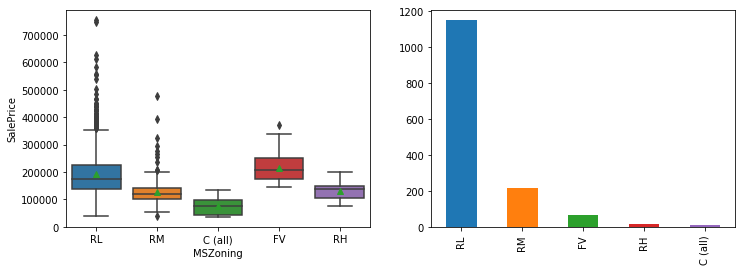

In [35]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'MSZoning', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.MSZoning.value_counts().plot(kind = 'bar')
plt.show()

In [36]:
cols1 = train.MSZoning.unique()
for col in cols1:
    print(col, 'mean', train[train['MSZoning'] == col]['SalePrice'].mean())

RL mean 191004.99478714162
RM mean 126316.83027522935
C (all) mean 74528.0
FV mean 214014.06153846154
RH mean 131558.375


* Street

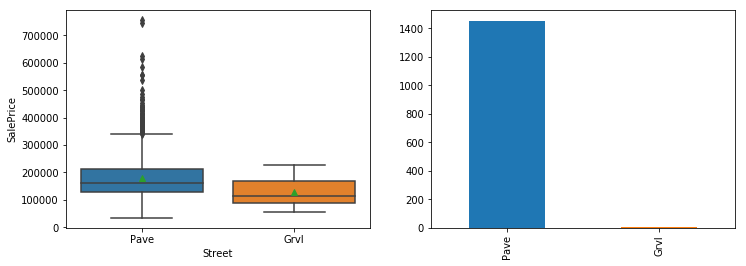

In [37]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Street', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.Street.value_counts().plot(kind = 'bar')
plt.show()

In [38]:
cols1 = train.Street.unique()
for col in cols1:
    print(col, 'mean', train[train['Street'] == col]['SalePrice'].mean())

Pave mean 181130.53851444292
Grvl mean 130190.5


* Lot Shape

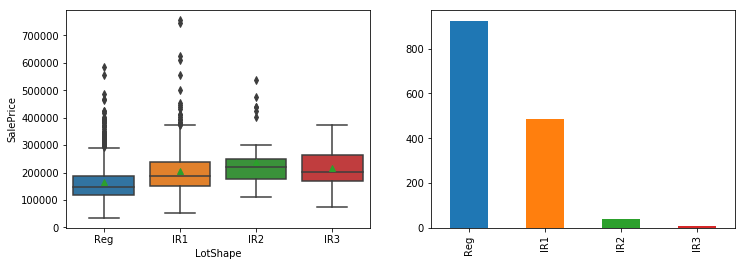

In [39]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'LotShape', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.LotShape.value_counts().plot(kind = 'bar')
plt.show()

In [40]:
cols1 = train.LotShape.unique()
for col in cols1:
    print(col, 'mean', train[train['LotShape'] == col]['SalePrice'].mean())

Reg mean 164754.81837837838
IR1 mean 206101.6652892562
IR2 mean 239833.36585365853
IR3 mean 216036.5


* LandContour

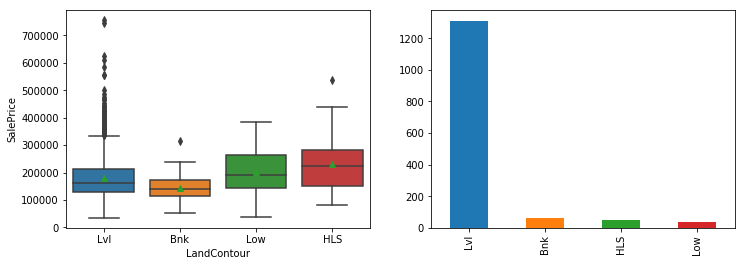

In [41]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'LandContour', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.LandContour.value_counts().plot(kind = 'bar')
plt.show()

In [42]:
cols1 = train.LandContour.unique()
for col in cols1:
    print(col, 'mean', train[train['LandContour'] == col]['SalePrice'].mean())

Lvl mean 180183.74675819985
Bnk mean 143104.07936507938
Low mean 203661.11111111112
HLS mean 231533.94


* Utilities

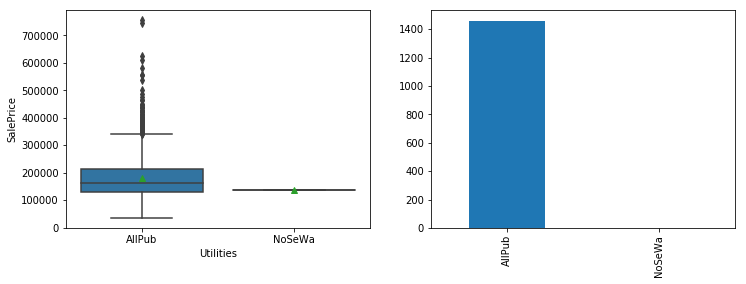

In [43]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Utilities', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.Utilities.value_counts().plot(kind = 'bar')
plt.show()

In [44]:
cols1 = train.Utilities.unique()
for col in cols1:
    print(col, 'mean', train[train['Utilities'] == col]['SalePrice'].mean())

AllPub mean 180950.95681973954
NoSeWa mean 137500.0


* LotConfig

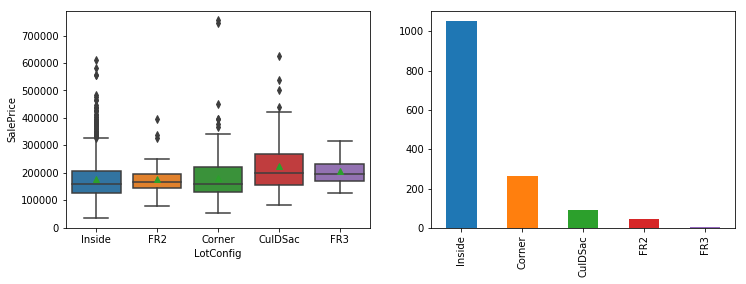

In [45]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'LotConfig', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.LotConfig.value_counts().plot(kind = 'bar')
plt.show()

In [46]:
cols1 = train.LotConfig.unique()
for col in cols1:
    print(col, 'mean', train[train['LotConfig'] == col]['SalePrice'].mean())

Inside mean 176938.0475285171
FR2 mean 177934.5744680851
Corner mean 181623.4258555133
CulDSac mean 223854.6170212766
FR3 mean 208475.0


* LandSlope

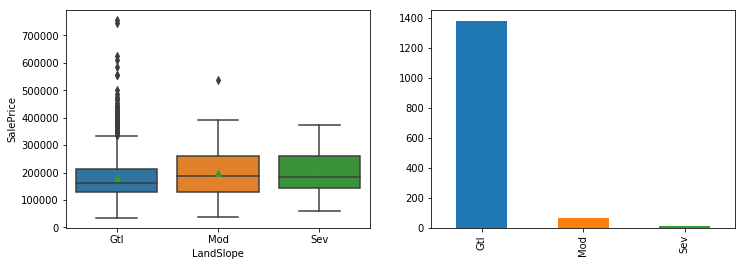

In [47]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'LandSlope', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.LandSlope.value_counts().plot(kind = 'bar')
plt.show()

In [48]:
cols1 = train.LandSlope.unique()
for col in cols1:
    print(col, 'mean', train[train['LandSlope'] == col]['SalePrice'].mean())

Gtl mean 179956.7995658466
Mod mean 196734.13846153847
Sev mean 204379.23076923078


* Neighborhood

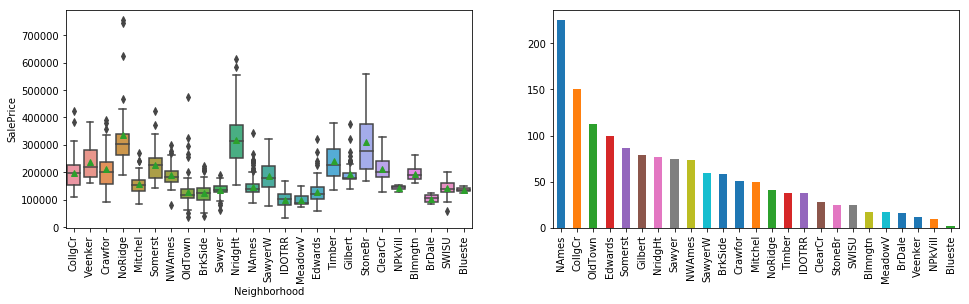

In [49]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Neighborhood', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Neighborhood.value_counts().plot(kind = 'bar')
plt.show()

In [50]:
cols1 = train.Neighborhood.unique()
for col in cols1:
    print(col, 'mean', train[train['Neighborhood'] == col]['SalePrice'].mean())

CollgCr mean 197965.77333333335
Veenker mean 238772.72727272726
Crawfor mean 210624.72549019608
NoRidge mean 335295.31707317074
Mitchel mean 156270.1224489796
Somerst mean 225379.83720930232
NWAmes mean 189050.0684931507
OldTown mean 128225.30088495575
BrkSide mean 124834.05172413793
Sawyer mean 136793.13513513515
NridgHt mean 316270.6233766234
NAmes mean 145847.08
SawyerW mean 186555.7966101695
IDOTRR mean 100123.78378378379
MeadowV mean 98576.4705882353
Edwards mean 128219.7
Timber mean 242247.44736842104
Gilbert mean 192854.50632911394
StoneBr mean 310499.0
ClearCr mean 212565.42857142858
NPkVill mean 142694.44444444444
Blmngtn mean 194870.88235294117
BrDale mean 104493.75
SWISU mean 142591.36
Blueste mean 137500.0


* BldgType

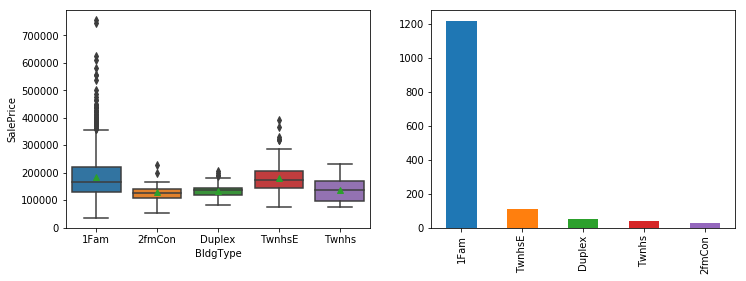

In [51]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'BldgType', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.BldgType.value_counts().plot(kind = 'bar')
plt.show()

In [52]:
cols1 = train.BldgType.unique()
for col in cols1:
    print(col, 'mean', train[train['BldgType'] == col]['SalePrice'].mean())

1Fam mean 185763.80737704918
2fmCon mean 128432.25806451614
Duplex mean 133541.07692307694
TwnhsE mean 181959.34210526315
Twnhs mean 135911.62790697673


* HouseStyle

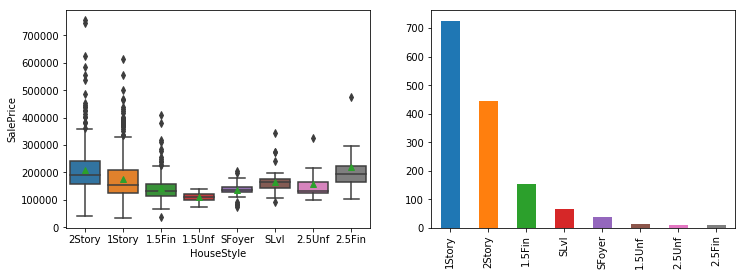

In [53]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'HouseStyle', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.HouseStyle.value_counts().plot(kind = 'bar')
plt.show()

In [54]:
cols1 = train.HouseStyle.unique()
for col in cols1:
    print(col, 'mean', train[train['HouseStyle'] == col]['SalePrice'].mean())

2Story mean 210051.76404494382
1Story mean 175985.4779614325
1.5Fin mean 143116.74025974027
1.5Unf mean 110150.0
SFoyer mean 135074.48648648648
SLvl mean 166703.38461538462
2.5Unf mean 157354.54545454544
2.5Fin mean 220000.0


* RoofStyle

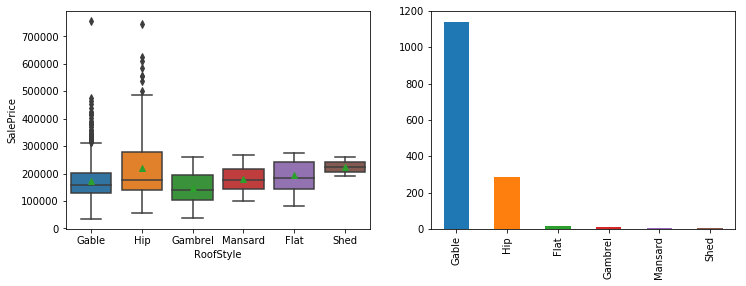

In [55]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'RoofStyle', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.RoofStyle.value_counts().plot(kind = 'bar')
plt.show()

In [56]:
cols1 = train.RoofStyle.unique()
for col in cols1:
    print(col, 'mean', train[train['RoofStyle'] == col]['SalePrice'].mean())

Gable mean 171483.95617879054
Hip mean 218876.93356643355
Gambrel mean 148909.0909090909
Mansard mean 180568.42857142858
Flat mean 194690.0
Shed mean 225000.0


* RoofMatl

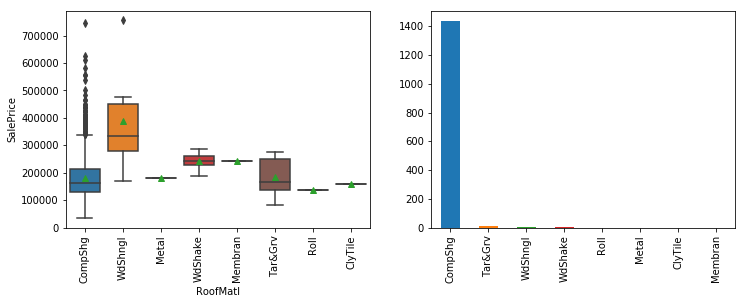

In [57]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'RoofMatl', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.RoofMatl.value_counts().plot(kind = 'bar')
plt.show()

In [58]:
cols1 = train.RoofMatl.unique()
for col in cols1:
    print(col, 'mean', train[train['RoofMatl'] == col]['SalePrice'].mean())

CompShg mean 179803.6792189679
WdShngl mean 390250.0
Metal mean 180000.0
WdShake mean 241400.0
Membran mean 241500.0
Tar&Grv mean 185406.36363636365
Roll mean 137000.0
ClyTile mean 160000.0


* Exterior1st

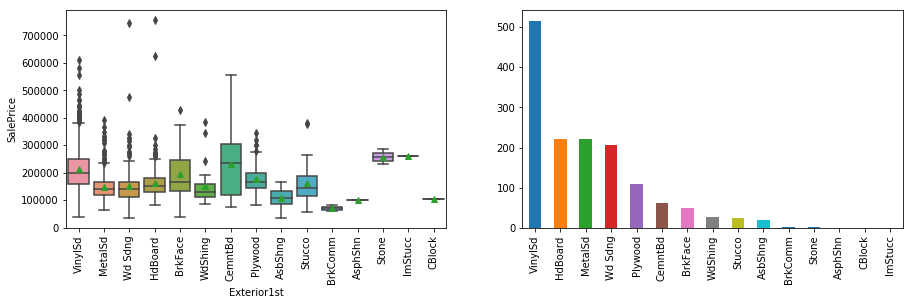

In [59]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Exterior1st', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Exterior1st.value_counts().plot(kind = 'bar')
plt.show()

In [60]:
cols1 = train.Exterior1st.unique()
for col in cols1:
    print(col, 'mean', train[train['Exterior1st'] == col]['SalePrice'].mean())

VinylSd mean 213732.90097087377
MetalSd mean 149422.17727272728
Wd Sdng mean 149841.64563106795
HdBoard mean 163077.45045045044
BrkFace mean 194573.0
WdShing mean 150655.07692307694
CemntBd mean 231690.65573770492
Plywood mean 175942.37962962964
AsbShng mean 107385.55
Stucco mean 162990.0
BrkComm mean 71000.0
AsphShn mean 100000.0
Stone mean 258500.0
ImStucc mean 262000.0
CBlock mean 105000.0


* Exterior2nd

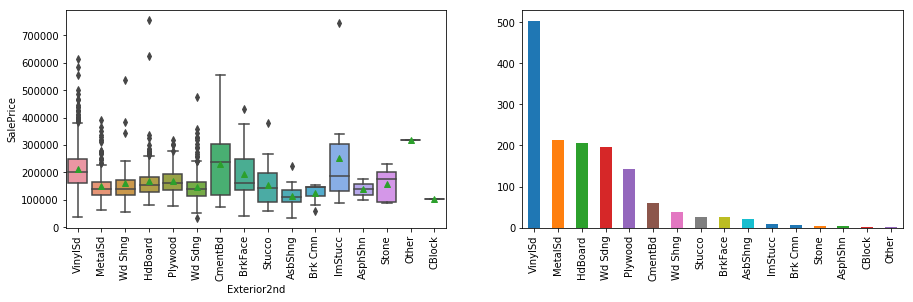

In [61]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Exterior2nd', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Exterior2nd.value_counts().plot(kind = 'bar')
plt.show()

In [62]:
cols1 = train.Exterior2nd.unique()
for col in cols1:
    print(col, 'mean', train[train['Exterior2nd'] == col]['SalePrice'].mean())

VinylSd mean 214432.46031746033
MetalSd mean 149803.17289719626
Wd Shng mean 161328.94736842104
HdBoard mean 167661.5652173913
Plywood mean 168112.38732394367
Wd Sdng mean 148386.0659898477
CmentBd mean 230093.83333333334
BrkFace mean 195818.0
Stucco mean 155905.15384615384
AsbShng mean 114060.55
Brk Cmn mean 126714.28571428571
ImStucc mean 252070.0
AsphShn mean 138000.0
Stone mean 158224.8
Other mean 319000.0
CBlock mean 105000.0


* MasVnrType

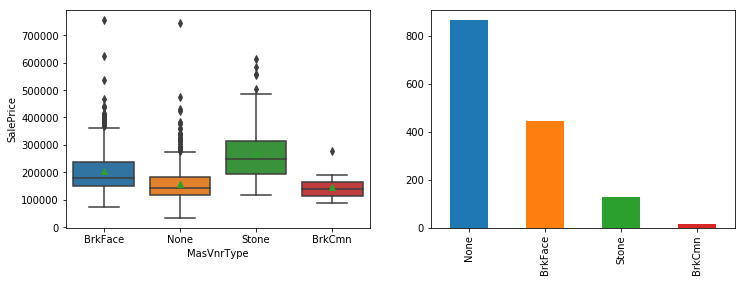

In [63]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'MasVnrType', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.MasVnrType.value_counts().plot(kind = 'bar')
plt.show()

In [64]:
cols1 = train.MasVnrType.unique()
for col in cols1:
    print(col, 'mean', train[train['MasVnrType'] == col]['SalePrice'].mean())

BrkFace mean 204691.87191011236
None mean 156221.8912037037
Stone mean 265583.625
BrkCmn mean 146318.06666666668
nan mean nan


* Foundation

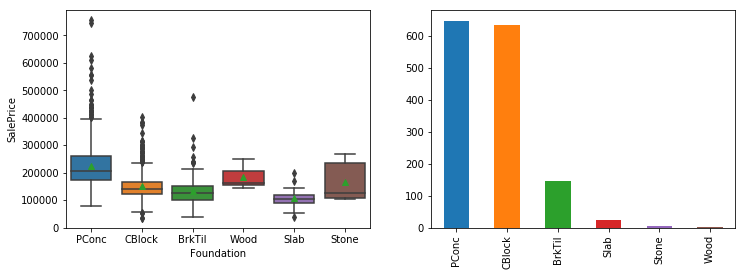

In [65]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Foundation', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Foundation.value_counts().plot(kind = 'bar')
plt.show()

In [66]:
cols1 = train.Foundation.unique()
for col in cols1:
    print(col, 'mean', train[train['Foundation'] == col]['SalePrice'].mean())

PConc mean 225230.44204018547
CBlock mean 149805.714511041
BrkTil mean 132291.07534246575
Wood mean 185666.66666666666
Slab mean 107365.625
Stone mean 165959.16666666666


* BsmtFinType1

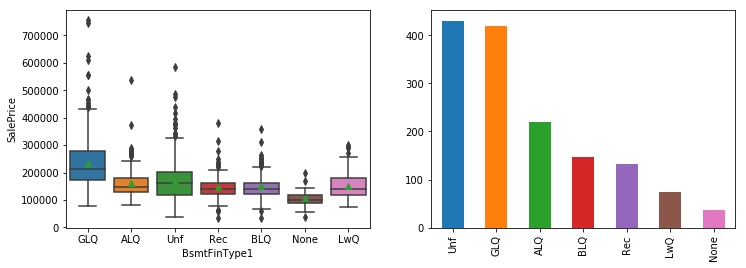

In [67]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'BsmtFinType1', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.BsmtFinType1.value_counts().plot(kind = 'bar')
plt.show()

In [68]:
cols1 = train.BsmtFinType1.unique()
for col in cols1:
    print(col, 'mean', train[train['BsmtFinType1'] == col]['SalePrice'].mean())

GLQ mean 235413.72009569377
ALQ mean 161573.06818181818
Unf mean 170670.57674418605
Rec mean 146889.24812030076
BLQ mean 149493.6554054054
None mean 105652.8918918919
LwQ mean 151852.7027027027


* BsmtFinType2

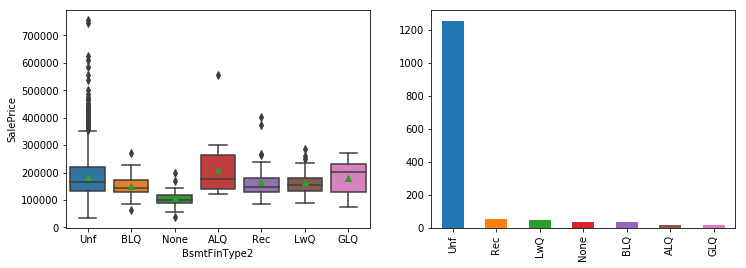

In [69]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'BsmtFinType2', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.BsmtFinType2.value_counts().plot(kind = 'bar')
plt.show()

In [70]:
cols1 = train.BsmtFinType2.unique()
for col in cols1:
    print(col, 'mean', train[train['BsmtFinType2'] == col]['SalePrice'].mean())

Unf mean 184773.692124105
BLQ mean 151101.0
None mean 105652.8918918919
ALQ mean 209942.1052631579
Rec mean 164917.12962962964
LwQ mean 164364.13043478262
GLQ mean 180982.14285714287


* Heating

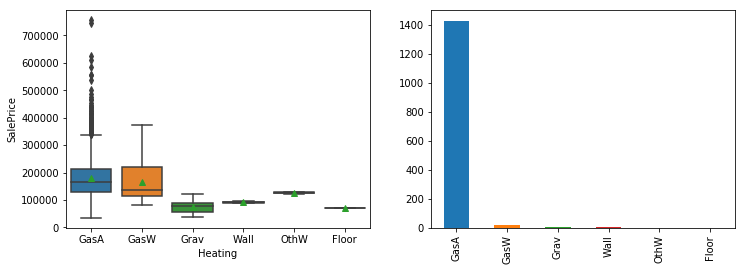

In [71]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Heating', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.Heating.value_counts().plot(kind = 'bar')
plt.show()

In [72]:
cols1 = train.Heating.unique()
for col in cols1:
    print(col, 'mean', train[train['Heating'] == col]['SalePrice'].mean())

GasA mean 182021.19537815126
GasW mean 166632.16666666666
Grav mean 75271.42857142857
Wall mean 92100.0
OthW mean 125750.0
Floor mean 72500.0


* CentralAir

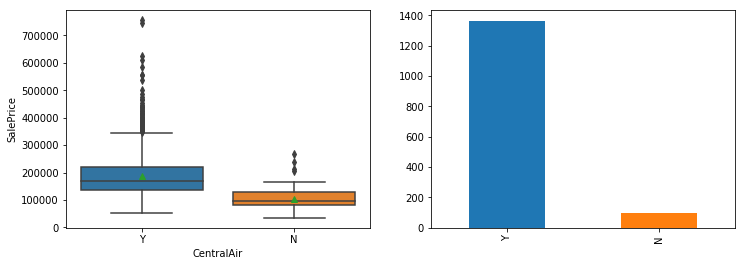

In [73]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'CentralAir', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.CentralAir.value_counts().plot(kind = 'bar')
plt.show()

In [74]:
cols1 = train.CentralAir.unique()
for col in cols1:
    print(col, 'mean', train[train['CentralAir'] == col]['SalePrice'].mean())

Y mean 186186.7098901099
N mean 105264.07368421053


* Electrical

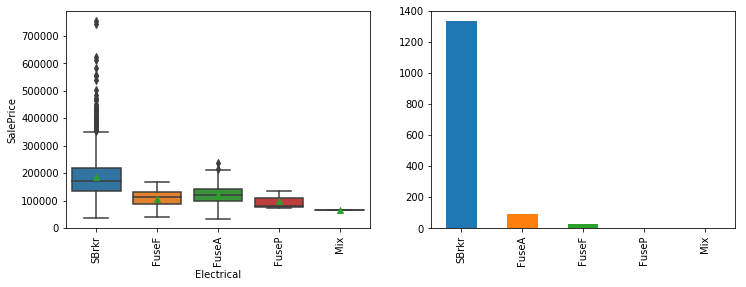

In [75]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Electrical', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Electrical.value_counts().plot(kind = 'bar')
plt.show()

In [76]:
cols1 = train.Electrical.unique()
for col in cols1:
    print(col, 'mean', train[train['Electrical'] == col]['SalePrice'].mean())

SBrkr mean 186825.1131934033
FuseF mean 107675.44444444444
FuseA mean 122196.89361702128
FuseP mean 97333.33333333333
Mix mean 67000.0
nan mean nan


* Functional

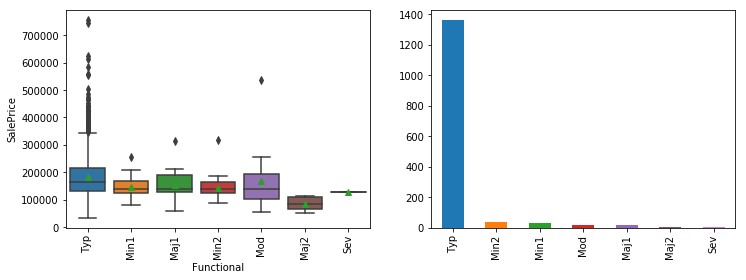

In [77]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Functional', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Functional.value_counts().plot(kind = 'bar')
plt.show()

In [78]:
cols1 = train.Functional.unique()
for col in cols1:
    print(col, 'mean', train[train['Functional'] == col]['SalePrice'].mean())

Typ mean 183429.14705882352
Min1 mean 146385.48387096773
Maj1 mean 153948.14285714287
Min2 mean 144240.64705882352
Mod mean 168393.33333333334
Maj2 mean 85800.0
Sev mean 129000.0


* GarageType

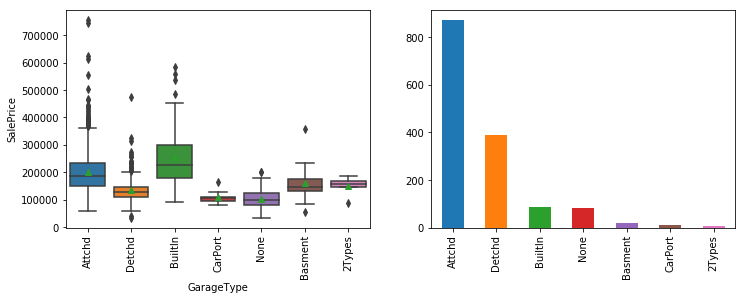

In [79]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'GarageType', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.GarageType.value_counts().plot(kind = 'bar')
plt.show()

In [80]:
cols1 = train.GarageType.unique()
for col in cols1:
    print(col, 'mean', train[train['GarageType'] == col]['SalePrice'].mean())

Attchd mean 202892.65632183908
Detchd mean 134091.16279069768
BuiltIn mean 254751.73863636365
CarPort mean 109962.11111111111
None mean 103317.28395061729
Basment mean 160570.68421052632
2Types mean 151283.33333333334


* GarageFinish

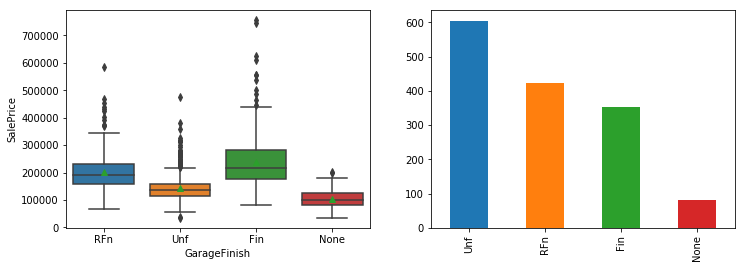

In [81]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'GarageFinish', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.GarageFinish.value_counts().plot(kind = 'bar')
plt.show()

In [82]:
cols1 = train.GarageFinish.unique()
for col in cols1:
    print(col, 'mean', train[train['GarageFinish'] == col]['SalePrice'].mean())

RFn mean 202068.86966824645
Unf mean 142156.42314049587
Fin mean 240052.6903409091
None mean 103317.28395061729


* PavedDrive

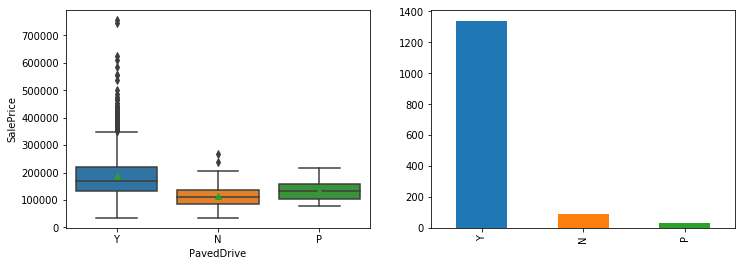

In [83]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'PavedDrive', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.PavedDrive.value_counts().plot(kind = 'bar')
plt.show()

In [84]:
cols1 = train.PavedDrive.unique()
for col in cols1:
    print(col, 'mean', train[train['PavedDrive'] == col]['SalePrice'].mean())

Y mean 186433.973880597
N mean 115039.12222222223
P mean 132330.0


* SaleType

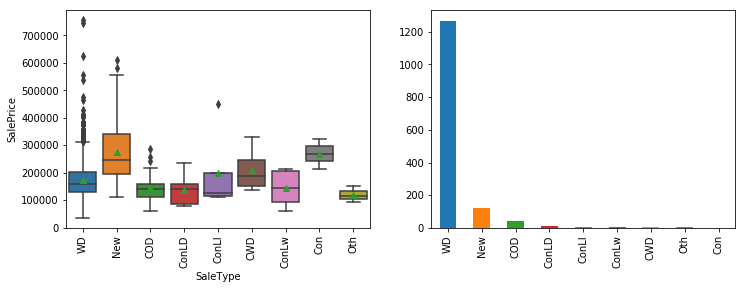

In [85]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'SaleType', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.SaleType.value_counts().plot(kind = 'bar')
plt.show()

In [86]:
cols1 = train.SaleType.unique()
for col in cols1:
    print(col, 'mean', train[train['SaleType'] == col]['SalePrice'].mean())

WD mean 173401.8366219416
New mean 274945.41803278687
COD mean 143973.2558139535
ConLD mean 138780.88888888888
ConLI mean 200390.0
CWD mean 210600.0
ConLw mean 143700.0
Con mean 269600.0
Oth mean 119850.0


* SaleCondition

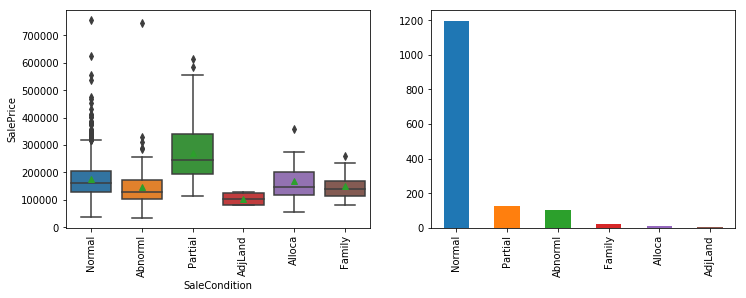

In [87]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'SaleCondition', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.SaleCondition.value_counts().plot(kind = 'bar')
plt.show()

In [88]:
cols1 = train.SaleCondition.unique()
for col in cols1:
    print(col, 'mean', train[train['SaleCondition'] == col]['SalePrice'].mean())

Normal mean 175202.21953255427
Abnorml mean 146526.62376237623
Partial mean 272291.752
AdjLand mean 104125.0
Alloca mean 167377.41666666666
Family mean 149600.0


* Condition1

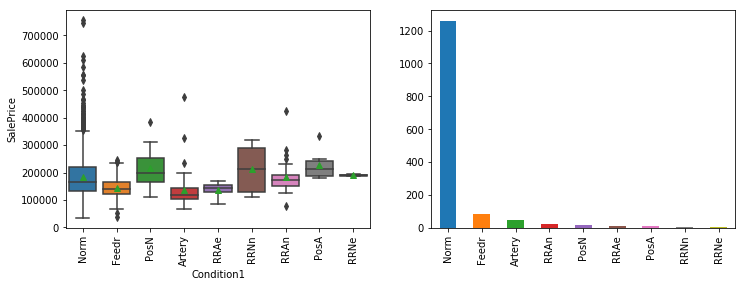

In [89]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Condition1', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Condition1.value_counts().plot(kind = 'bar')
plt.show()

In [90]:
cols1 = train.Condition1.unique()
for col in cols1:
    print(col, 'mean', train[train['Condition1'] == col]['SalePrice'].mean())

Norm mean 184495.49206349207
Feedr mean 142475.4814814815
PosN mean 215184.2105263158
Artery mean 135091.66666666666
RRAe mean 138400.0
RRNn mean 212400.0
RRAn mean 184396.61538461538
PosA mean 225875.0
RRNe mean 190750.0


* Condition2

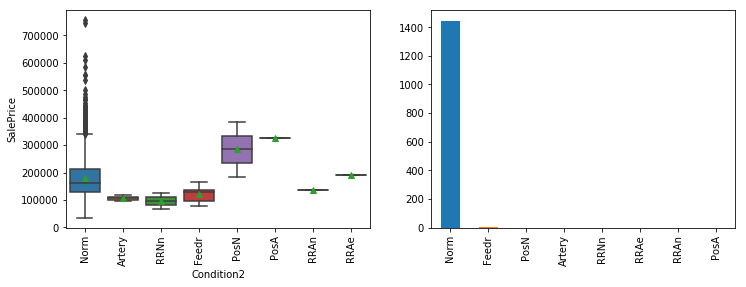

In [91]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'Condition2', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.Condition2.value_counts().plot(kind = 'bar')
plt.show()

In [92]:
cols1 = train.Condition2.unique()
for col in cols1:
    print(col, 'mean', train[train['Condition2'] == col]['SalePrice'].mean())

Norm mean 181169.40553633217
Artery mean 106500.0
RRNn mean 96750.0
Feedr mean 121166.66666666667
PosN mean 284875.0
PosA mean 325000.0
RRAn mean 136905.0
RRAe mean 190000.0


### Ordinal özelliklerin keşfi, encoding

Burada ordinal olan kategorik değişkenleri sürekli hale getireceğiz.

* ExterQual

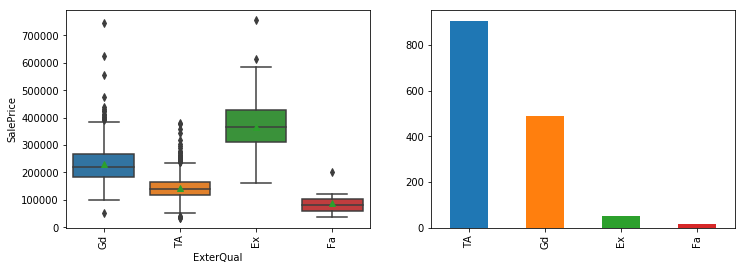

In [93]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'ExterQual', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.ExterQual.value_counts().plot(kind = 'bar')
plt.show()

In [94]:
cols1 = train.ExterQual.unique()
for col in cols1:
    print(col, 'mean', train[train['ExterQual'] == col]['SalePrice'].mean())

Gd mean 231633.51024590165
TA mean 144341.31346578366
Ex mean 367360.96153846156
Fa mean 87985.21428571429


In [95]:
train['ExterQual'] = train['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* ExterCond

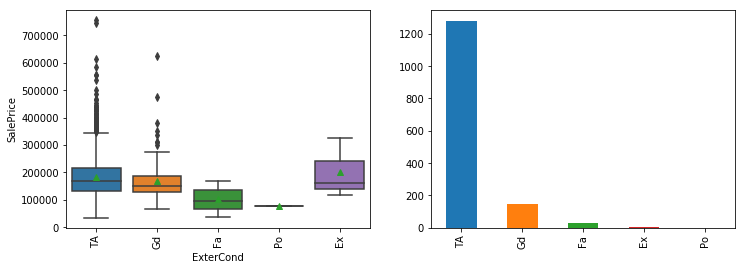

In [96]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'ExterCond', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.ExterCond.value_counts().plot(kind = 'bar')
plt.show()

In [97]:
cols1 = train.ExterCond.unique()
for col in cols1:
    print(col, 'mean', train[train['ExterCond'] == col]['SalePrice'].mean())

TA mean 184034.89625585024
Gd mean 168897.5684931507
Fa mean 102595.14285714286
Po mean 76500.0
Ex mean 201333.33333333334


In [98]:
train['ExterCond'] = train['ExterCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* BsmtQual

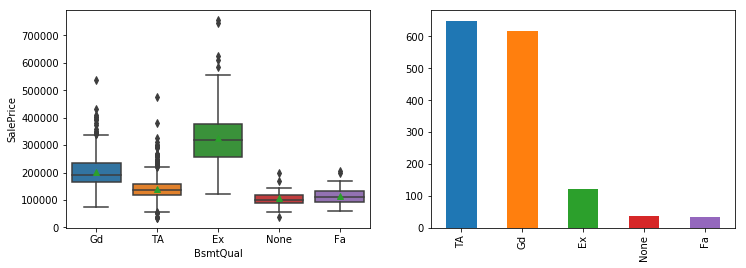

In [99]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'BsmtQual', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.BsmtQual.value_counts().plot(kind = 'bar')
plt.show()

In [100]:
cols1 = train.BsmtQual.unique()
for col in cols1:
    print(col, 'mean', train[train['BsmtQual'] == col]['SalePrice'].mean())

Gd mean 202688.4789644013
TA mean 140759.81818181818
Ex mean 327041.04132231406
None mean 105652.8918918919
Fa mean 115692.02857142857


In [101]:
train['BsmtQual'] = train['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* BsmtCond

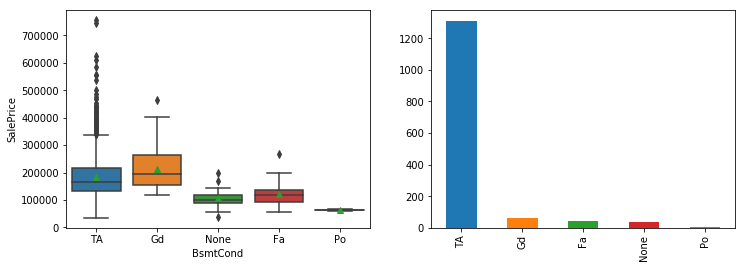

In [102]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'BsmtCond', y = 'SalePrice', showmeans=True)
plt.subplot(1,2,2)
train.BsmtCond.value_counts().plot(kind = 'bar')
plt.show()

In [103]:
cols1 = train.BsmtCond.unique()
for col in cols1:
    print(col, 'mean', train[train['BsmtCond'] == col]['SalePrice'].mean())

TA mean 183632.6209000763
Gd mean 213599.9076923077
None mean 105652.8918918919
Fa mean 121809.53333333334
Po mean 64000.0


In [104]:
train['BsmtCond'] = train['BsmtCond'].map({'None':2,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* BsmtExposure

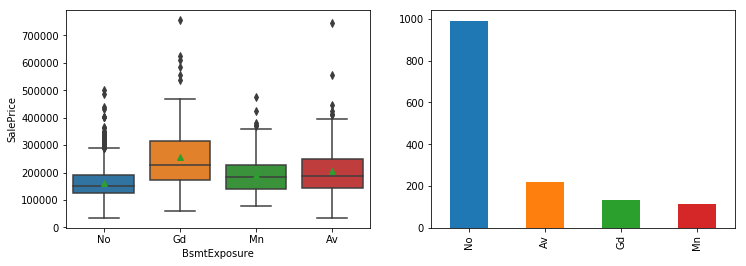

In [105]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'BsmtExposure', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.BsmtExposure.value_counts().plot(kind = 'bar')
plt.show()

In [106]:
cols1 = train.BsmtExposure.unique()
for col in cols1:
    print(col, 'mean', train[train['BsmtExposure'] == col]['SalePrice'].mean())

No mean 163439.24823410696
Gd mean 257689.80597014926
Mn mean 192789.65789473685
Av mean 206643.42081447964


In [107]:
train['BsmtExposure'] = train['BsmtExposure'].map({'No':0,'Mn':2,'Av':3,'Gd':4})

* HeatingQC

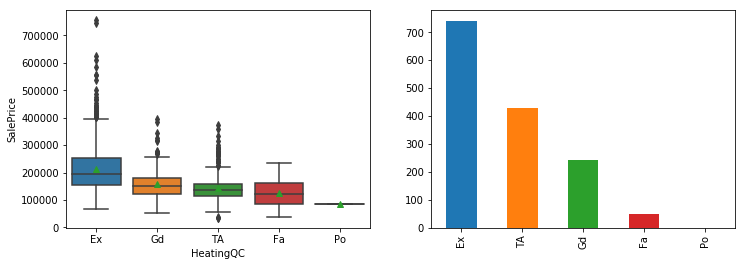

In [108]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'HeatingQC', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.HeatingQC.value_counts().plot(kind = 'bar')
plt.show()

In [109]:
cols1 = train.HeatingQC.unique()
for col in cols1:
    print(col, 'mean', train[train['HeatingQC'] == col]['SalePrice'].mean())

Ex mean 214914.42914979756
Gd mean 156858.87136929462
TA mean 142362.8761682243
Fa mean 123919.48979591837
Po mean 87000.0


In [110]:
train['HeatingQC'] = train['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* KitchenQual

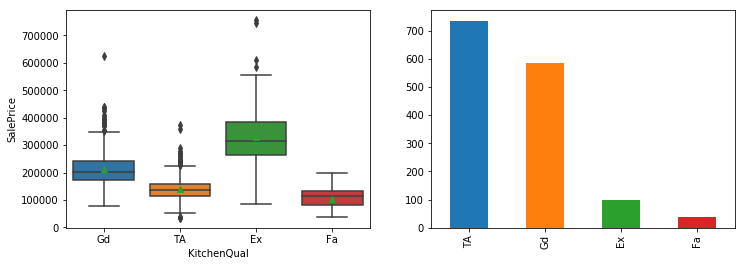

In [111]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'KitchenQual', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.KitchenQual.value_counts().plot(kind = 'bar')
plt.show()

In [112]:
cols1 = train.KitchenQual.unique()
for col in cols1:
    print(col, 'mean', train[train['KitchenQual'] == col]['SalePrice'].mean())

Gd mean 212116.02389078497
TA mean 139962.51156462586
Ex mean 328554.67
Fa mean 105565.20512820513


In [113]:
train['KitchenQual'] = train['KitchenQual'].map({'None':train['KitchenQual'].mode(),'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* FireplaceQu

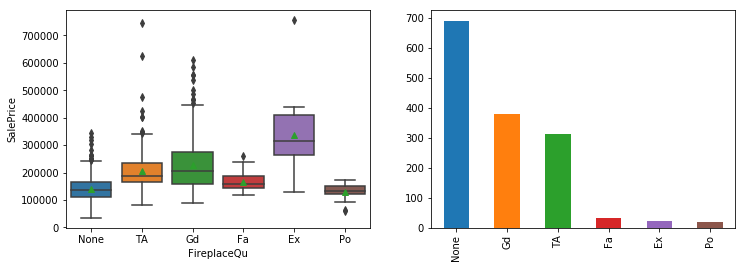

In [114]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'FireplaceQu', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.FireplaceQu.value_counts().plot(kind = 'bar')
plt.show()

In [115]:
cols1 = train.FireplaceQu.unique()
for col in cols1:
    print(col, 'mean', train[train['FireplaceQu'] == col]['SalePrice'].mean())

None mean 141331.48260869566
TA mean 205723.48881789137
Gd mean 226351.41578947369
Fa mean 167298.48484848486
Ex mean 337712.5
Po mean 129764.15


In [116]:
train['FireplaceQu'] = train['FireplaceQu'].map({'None':2,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* GarageQual

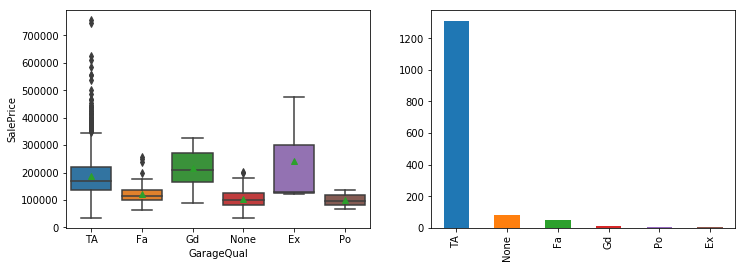

In [117]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'GarageQual', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.GarageQual.value_counts().plot(kind = 'bar')
plt.show()

In [118]:
cols1 = train.GarageQual.unique()
for col in cols1:
    print(col, 'mean', train[train['GarageQual'] == col]['SalePrice'].mean())

TA mean 187489.8360030511
Fa mean 123573.35416666667
Gd mean 215860.7142857143
None mean 103317.28395061729
Ex mean 241000.0
Po mean 100166.66666666667


In [119]:
train['GarageQual'] = train['GarageQual'].map({'None':1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* GarageCond

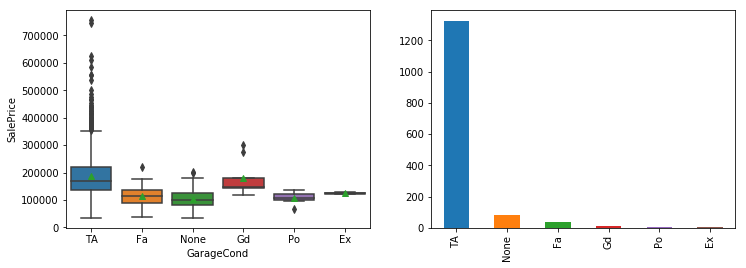

In [120]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'GarageCond', y = 'SalePrice', showmeans=True)
# plt.xticks(rotation = 90)
plt.subplot(1,2,2)
train.GarageCond.value_counts().plot(kind = 'bar')
plt.show()

In [121]:
cols1 = train.GarageCond.unique()
for col in cols1:
    print(col, 'mean', train[train['GarageCond'] == col]['SalePrice'].mean())

TA mean 187885.73529411765
Fa mean 114654.02857142857
None mean 103317.28395061729
Gd mean 179930.0
Po mean 108500.0
Ex mean 124000.0


In [122]:
train['GarageCond'] = train['GarageCond'].map({'None':1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [123]:
ordinaries = ['SalePrice','ExterQual', 'ExterCond','BsmtQual','BsmtCond', 
              'BsmtExposure', 'HeatingQC', 'KitchenQual', 
              'FireplaceQu','GarageQual', 'GarageCond']
train[ordinaries].corr()

,SalePrice,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,FireplaceQu,GarageQual,GarageCond
SalePrice,1.000000,0.682639,0.018899,0.585207,0.212940,0.355147,0.427649,0.518983,0.280266,0.265883
ExterQual,0.682639,1.000000,0.009184,0.565558,0.199074,0.237195,0.520027,0.390011,0.220153,0.214523
ExterCond,0.018899,0.009184,1.000000,-0.019297,0.172412,-0.002959,0.055520,-0.004317,0.100428,0.113457
BsmtQual,0.585207,0.565558,-0.019297,1.000000,0.454538,0.314532,0.397169,0.305685,0.185813,0.201226
BsmtCond,0.212940,0.199074,0.172412,0.454538,1.000000,0.128778,0.166832,0.100133,0.140298,0.162090
BsmtExposure,0.355147,0.237195,-0.002959,0.314532,0.128778,1.000000,0.140386,0.159437,0.074584,0.063343
HeatingQC,0.427649,0.520027,0.055520,0.397169,0.166832,0.140386,1.000000,0.227937,0.148295,0.162628
FireplaceQu,0.518983,0.390011,-0.004317,0.305685,0.100133,0.159437,0.227937,1.000000,0.191456,0.179061
GarageQual,0.280266,0.220153,0.100428,0.185813,0.140298,0.074584,0.148295,0.191456,1.000000,0.918548
GarageCond,0.265883,0.214523,0.113457,0.201226,0.162090,0.063343,0.162628,0.179061,0.918548,1.000000


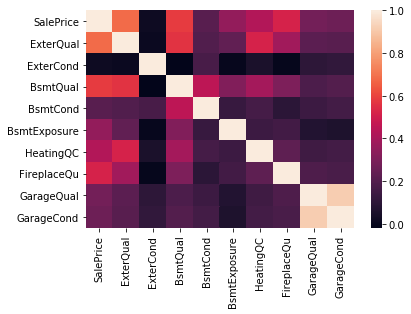

In [124]:
sns.heatmap(train[ordinaries].corr())
plt.show()

 Etkili olabilecek ordinal değişkenler
* ExterQual
* BsmtQual
* KitchenQual
* FirePlaceQu
* HeatingQC

### Aykırı değerler

In [125]:
numericals = train.select_dtypes(exclude = ['object']).columns
numericals

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [126]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
((train[numericals] < (Q1 - 1.5 * IQR)) | (train[numericals] > (Q3 + 1.5 * IQR))).sum()

MSSubClass       103
LotFrontage       88
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        98
ExterQual          0
ExterCond        178
BsmtQual          37
BsmtCond         149
BsmtExposure       0
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
HeatingQC          0
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
FireplaceQu        0
GarageYrBlt       81
GarageCars         5
GarageArea        21
GarageQual       149
GarageCond       134
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
SalePrice         61
dtype: int64

In [127]:
train.MSSubClass = winsorize(train.MSSubClass, 0.06)
train.LotFrontage = winsorize(train.LotFrontage, 0.05)
train.LotArea = winsorize(train.LotArea, 0.05)
train.OverallCond = winsorize(train.OverallCond, 0.06)
train.YearBuilt = winsorize(train.YearBuilt, 0.01 )
train.MasVnrArea = winsorize(train.MasVnrArea, 0.05 )
train.BsmtFinSF1 = winsorize(train.BsmtFinSF1, 0.01)
train.BsmtUnfSF = winsorize(train.BsmtUnfSF, 0.02)
train.ExterCond = winsorize(train.ExterCond, 0.01)
train.TotalBsmtSF = winsorize(train.TotalBsmtSF, 0.03)
train['1stFlrSF'] = winsorize(train['1stFlrSF'], 0.03)
train.GrLivArea = winsorize(train.GrLivArea, 0.03)
train.BedroomAbvGr = winsorize(train.BedroomAbvGr,0.02)
train.KitchenAbvGr = winsorize(train.KitchenAbvGr, 0.01)
train.TotRmsAbvGrd = winsorize(train.TotRmsAbvGrd, 0.03)
train.Fireplaces = winsorize(train.Fireplaces, 0.01)
train.GarageArea = winsorize(train.GarageArea, 0.015)
train.WoodDeckSF = winsorize(train.WoodDeckSF, 0.024)
train.OpenPorchSF = winsorize(train.OpenPorchSF,0.06)
train.MiscVal = winsorize(train.MiscVal, 0.01)
train.SalePrice = winsorize(train.SalePrice,(0, 0.042))

* Bazı değişkenlerin aykırı değerleri ile uğraşmadım. Çünkü çoğunluğu sıfır olan bu değişkenlerdeki herhangi bir pozitif rakam aykırı olarak görünüyor. Bunları silersek analizimiz olumsuz etkilenebilir.

<Figure size 432x288 with 0 Axes>

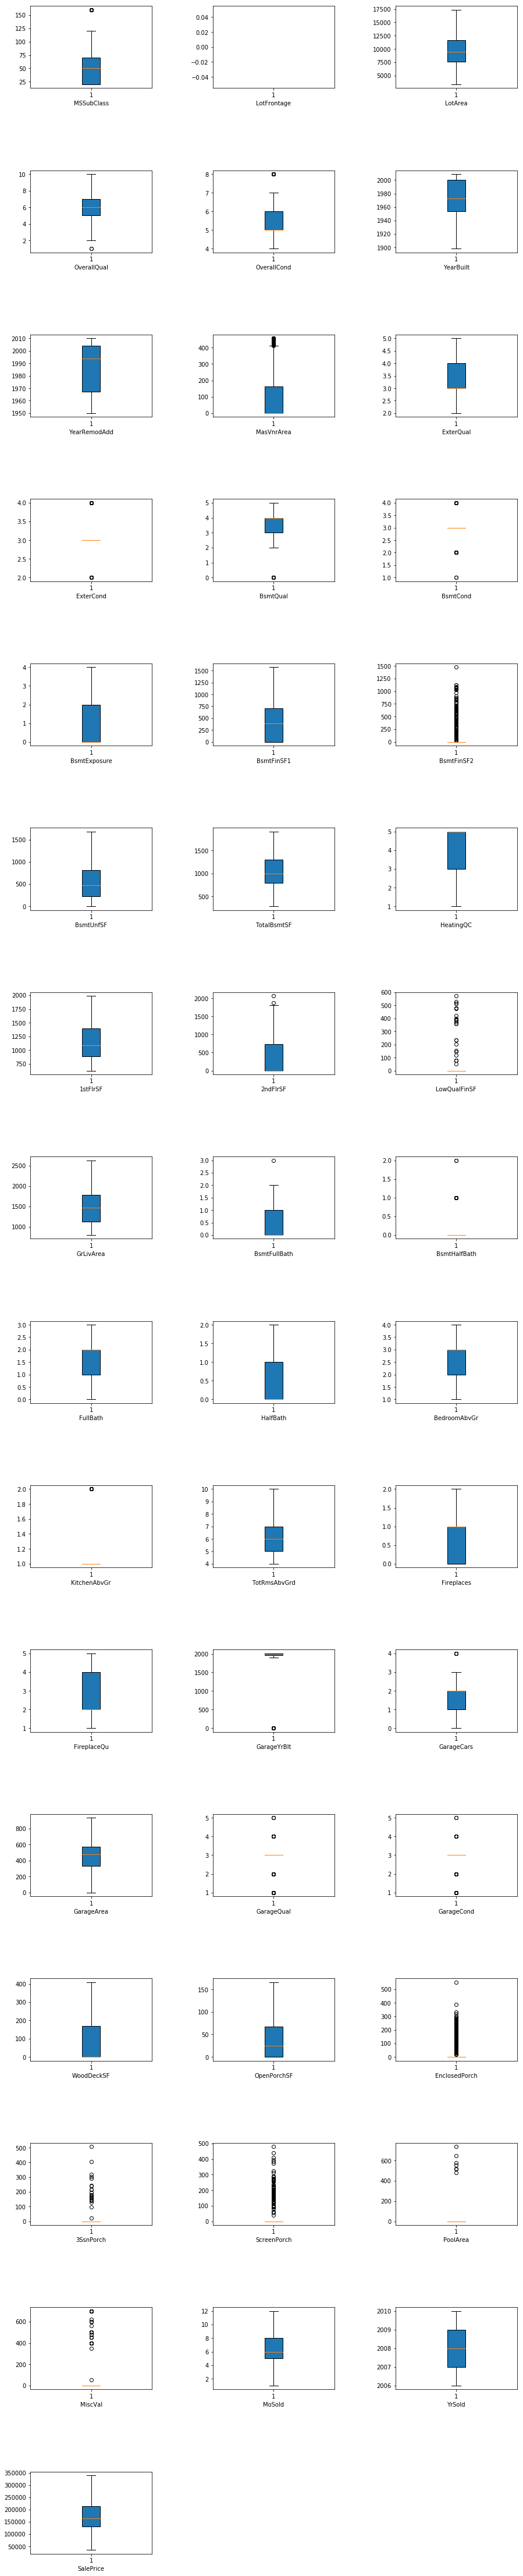

In [128]:
plt.subplots_adjust(bottom = 0.5, wspace = 0.2, hspace = 0.4)
plt.figure(figsize = (15,160))
for i in range(1,47):
    plt.subplots_adjust(bottom = 0.5, wspace = 0.5, hspace = 1)
    plt.subplot(16, 3, i)
    plt.xlabel(numericals[i-1])
    plt.boxplot(train[numericals[i-1]], patch_artist=True)
plt.show()

* Test ve train verilerini tekrar birleştirip kategorik değişkenleri her iki veride de dummy olarak değiştirelim.

In [129]:
final_train = train.drop(columns = ['SalePrice'])

In [130]:
final_test = test

In [131]:
final_features = pd.concat([final_train, final_test]).reset_index(drop=True)

In [132]:
final_features = pd.get_dummies(final_features).reset_index(drop = True)
final_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


* Verimizi tekrar ayıralım ve ordinal değişkenleri tekrar güncel veri kümemize dahil edelim. 

In [133]:
last_train = final_features.iloc[:1460, :]
last_test = final_features.iloc[1460:,:]

In [134]:
last_train['BsmtQual'] = train.BsmtQual
last_train['BsmtCond'] = train.BsmtCond
last_train['GarageQual'] = train.GarageQual
last_train['HeatingQC'] = train.HeatingQC
last_train['FireplaceQu'] = train.FireplaceQu
last_train['BsmtExposure'] = train.BsmtExposure
last_train['FireplaceQu'] = train.FireplaceQu
last_train['ExterQual'] = train.ExterQual
last_train['KitchenQual'] = train.KitchenQual
last_train['GarageCond'] = train.GarageCond
last_train['SalePrice'] = train.SalePrice
last_train['ExterQual'] = train.ExterQual
last_train['ExterCond'] = train.ExterCond

In [135]:
last_train.LotFrontage = last_train.LotFrontage.fillna(last_train.LotFrontage.mean())

verimizde kayıp değer kalmadı

### Sürekli değişkenlerin incelenmesi

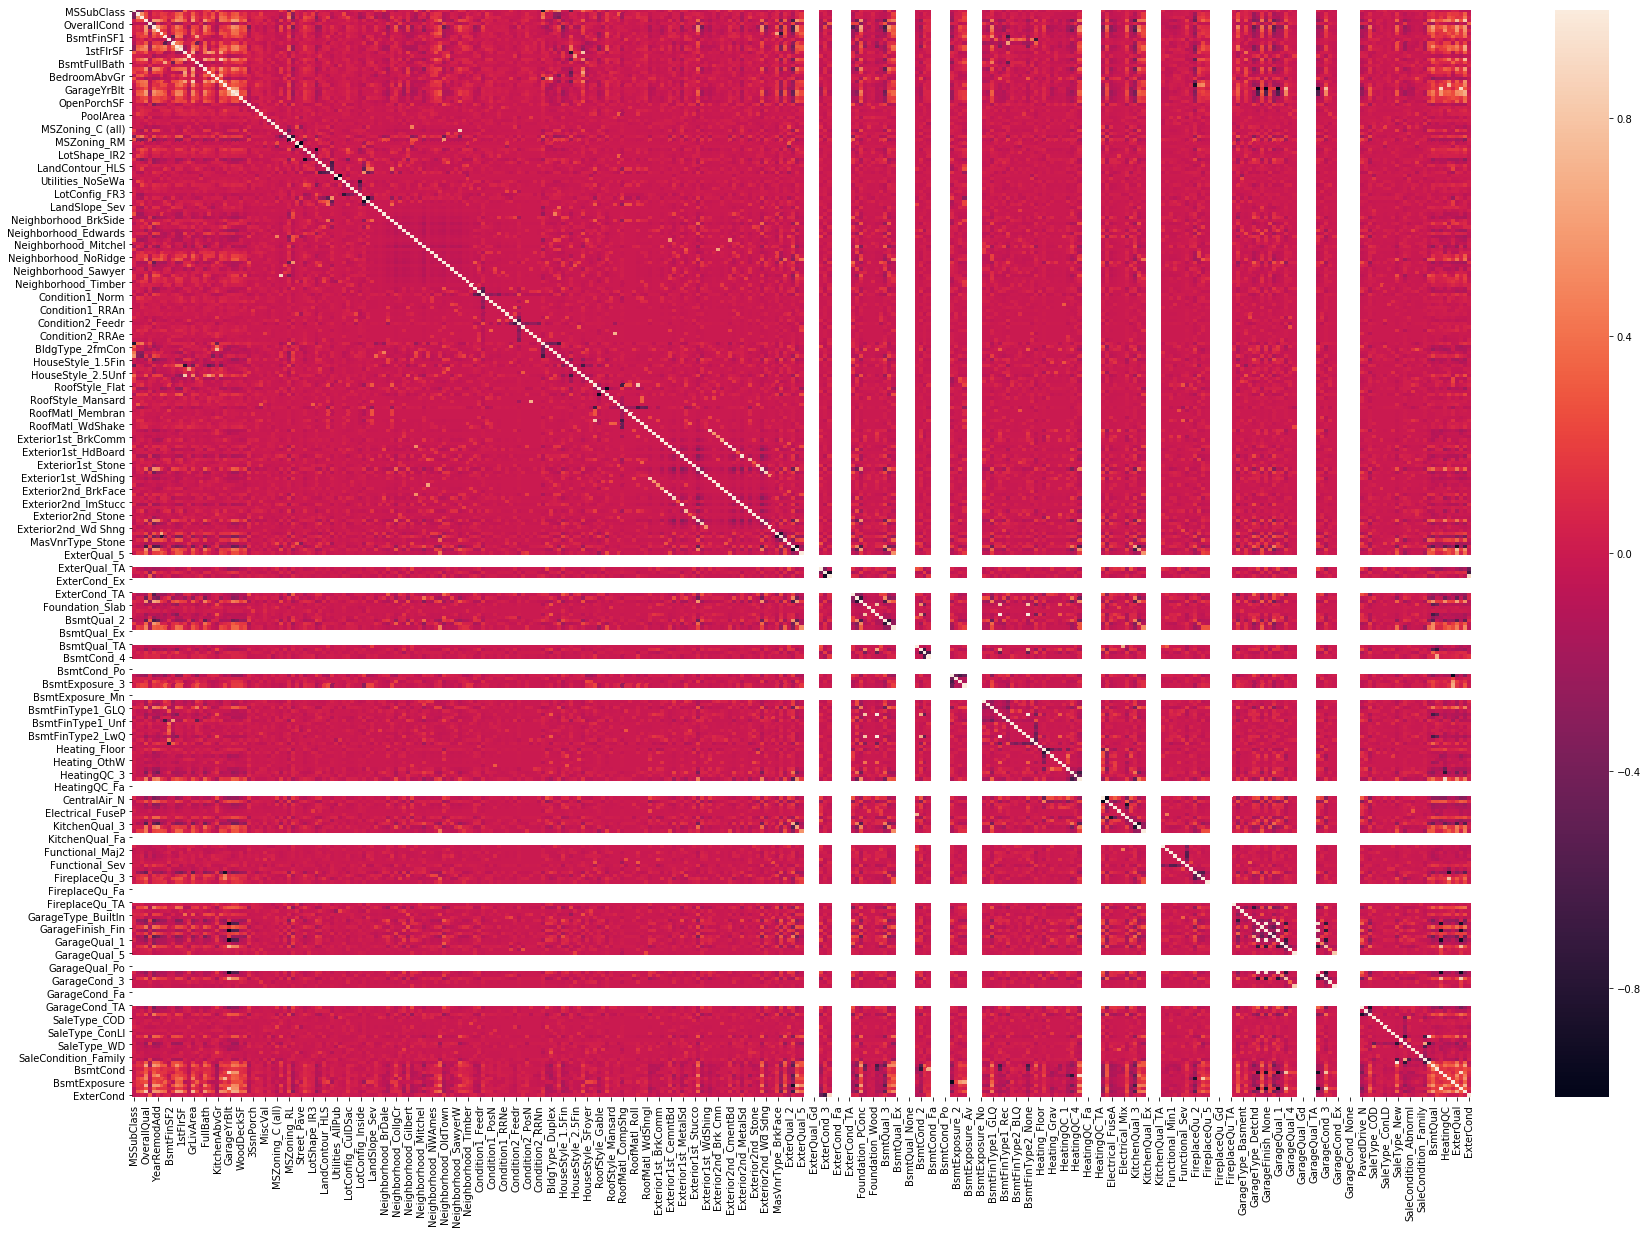

In [136]:
plt.figure(figsize=(30,20))
sns.heatmap(last_train.corr())

### Yeni özellikler türetme

Hedefi açıklamamızda etkili olabileceği düşünülen değişkenler üretelim.

In [137]:
last_train['AllSF'] = last_train.GrLivArea + last_train.TotalBsmtSF # total square feet
last_train['AllFloorSF'] = last_train['1stFlrSF'] + last_train['2ndFlrSF']
last_train['TotalPorch'] = last_train.OpenPorchSF + last_train.EnclosedPorch
+ last_train['3SsnPorch'] + last_train.ScreenPorch # total porch sf
last_train['Rooms'] = last_train.TotRmsAbvGrd + last_train.FullBath + last_train.HalfBath #total rooms
last_train['Bathrooms'] = last_train.FullBath + last_train.HalfBath + last_train.BsmtFullBath + last_train.BsmtHalfBath #total baths
last_train['AreaByRoom'] = last_train.GrLivArea/ last_train.Rooms # area per room
last_train['OveralQualCond'] = last_train.OverallCond + last_train.OverallQual # overal grade 1
last_train['OveralQualCond2'] = last_train.OverallCond * last_train.OverallQual # overall grade 2
last_train['GarageQualCond'] = last_train.GarageArea + last_train.GarageCond #overall garage grade 1
last_train['GarageQualCond2'] = last_train.GarageArea * last_train.GarageCond #overall garage grade 2
last_train['GarageScore'] = last_train.GarageQual * last_train.GarageArea
last_train['GarageAreaCar'] = last_train.GarageArea + last_train.GarageCars 
last_train['ExterGrade'] = last_train.ExterCond * last_train.ExterQual
last_train['KitchenScore'] = last_train.KitchenAbvGr * train.KitchenQual
last_train['FirePlaceScore'] = last_train.Fireplaces * last_train.FireplaceQu

basitleştirilmiş quality ve condition özellikleri üretelim.

In [138]:
last_train["SimplOverallQual"] = last_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
last_train["SimplOverallCond"] = last_train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
last_train["SimplGarageCond"] = last_train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
last_train["SimplGarageQual"] = last_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
last_train["SimplFireplaceQu"] = last_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
last_train["SimplFireplaceQu"] = last_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
last_train["SimplKitchenQual"] = last_train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
last_train["SimplHeatingQC"] = last_train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
last_train["SimplBsmtCond"] = last_train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
last_train["SimplBsmtQual"] = last_train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
last_train["SimplExterCond"] = last_train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
last_train["SimplExterQual"] = last_train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [139]:
last_train["SimplOverallGrade"] = last_train["SimplOverallQual"] * last_train["SimplOverallCond"]
# Simplified overall quality of the exterior
last_train["SimplExterGrade"] = last_train["SimplExterQual"] * last_train["SimplExterCond"]
# Simplified overall garage score
last_train["SimplGarageScore"] = last_train["GarageArea"] * last_train["SimplGarageQual"]
# Simplified overall fireplace score
last_train["SimplFireplaceScore"] = last_train["Fireplaces"] * last_train["SimplFireplaceQu"]
# Simplified overall kitchen score
last_train["SimplKitchenScore"] = last_train["KitchenAbvGr"] * last_train["SimplKitchenQual"]

hedefle ilişkisi yüksek olan özelliklerden üssel yeni değişkenler üretelim

In [140]:
last_train["OverallQual-s2"] = last_train["OverallQual"] ** 2
last_train["OverallQual-s3"] = last_train["OverallQual"] ** 3
last_train["OverallQual-Sq"] = last_train["OverallQual"] ** 0.5
last_train["AllSF-2"] = last_train["AllSF"] ** 2
last_train["AllSF-3"] = last_train["AllSF"] ** 3
last_train["AllSF-Sq"] = last_train["AllSF"] ** 0.5
last_train["AllFlrsSF-2"] = last_train["AllFloorSF"] ** 2
last_train["AllFlrsSF-3"] = last_train["AllFloorSF"] ** 3
last_train["AllFlrsSF-Sq"] = last_train["AllFloorSF"] ** 0.5
last_train["GrLivArea-2"] = last_train["GrLivArea"] ** 2
last_train["GrLivArea-3"] = last_train["GrLivArea"] ** 3
last_train["GrLivArea-Sq"] = last_train["GrLivArea"] ** 0.5
last_train["SimplOverallQual-s2"] = last_train["SimplOverallQual"] ** 2
last_train["SimplOverallQual-s3"] = last_train["SimplOverallQual"] ** 3
last_train["SimplOverallQual-Sq"] = last_train["SimplOverallQual"] ** 0.5
last_train["ExterQual-2"] = last_train["ExterQual"] ** 2
last_train["ExterQual-3"] = last_train["ExterQual"] ** 3
last_train["ExterQual-Sq"] = last_train["ExterQual"] ** 0.5
last_train["GarageCars-2"] = last_train["GarageCars"] ** 2
last_train["GarageCars-3"] = last_train["GarageCars"] ** 3
last_train["GarageCars-Sq"] = last_train["GarageCars"] ** 0.5
last_train["TotalBath-2"] = last_train["Bathrooms"] ** 2
last_train["TotalBath-3"] = last_train["Bathrooms"] ** 3
last_train["TotalBath-Sq"] = last_train["Bathrooms"] ** 0.5
last_train["KitchenQual-2"] = last_train["KitchenQual"] ** 2
last_train["KitchenQual-3"] = last_train["KitchenQual"] ** 3
last_train["KitchenQual-Sq"] = last_train["KitchenQual"] ** 0.5
last_train["GarageScore-2"] = last_train["GarageScore"] ** 2
last_train["GarageScore-3"] = last_train["GarageScore"] ** 3
last_train["GarageScore-Sq"] = np.sqrt(last_train["GarageScore"])

In [141]:
cor = last_train.corr()
cor['SalePrice'].sort_values(ascending = False)[0:40]

SalePrice              1.000000
OverallQual-s2         0.827295
AllSF                  0.825915
AllSF-2                0.821128
AllSF-Sq               0.819490
OverallQual-s3         0.817923
OverallQual            0.816857
OverallQual-Sq         0.800580
AllSF-3                0.797249
GrLivArea              0.727704
GrLivArea-Sq           0.727414
AllFlrsSF-Sq           0.726385
AllFloorSF             0.721864
SimplOverallQual-s2    0.719333
SimplOverallQual-s3    0.717653
SimplOverallQual       0.716597
GrLivArea-2            0.712236
SimplOverallQual-Sq    0.710457
ExterQual              0.699290
ExterQual-2            0.698303
ExterQual-Sq           0.697182
ExterQual-3            0.690815
GarageCars-2           0.688454
AllFlrsSF-2            0.681929
GrLivArea-3            0.681460
GarageCars             0.672295
GarageAreaCar          0.660335
GarageArea             0.660038
GarageQualCond         0.659886
SimplExterQual         0.659682
GarageScore            0.659563
GarageQu

### Özellikleri 4 başlık altında toplayalım:

Quality, location, space, building

In [142]:
last_columns = last_train.columns
print(last_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'GarageCars-Sq', 'TotalBath-2', 'TotalBath-3', 'TotalBath-Sq',
       'KitchenQual-2', 'KitchenQual-3', 'KitchenQual-Sq', 'GarageScore-2',
       'GarageScore-3', 'GarageScore-Sq'],
      dtype='object', length=399)


### Space features

In [143]:
space_features = []
for i in range(len(last_columns)):
    
    if (('Area') in 
        last_columns[i]) or (('Porch') in 
                             last_columns[i]) or (('Bath') in 
                                                  last_columns[i]) or (('Room') in 
                                                                       last_columns[i]) or (('Car') in last_columns[i]) :
        space_features.append(last_columns[i])
    elif (('SF') in last_columns[i]) or (('Abv') in last_columns[i]) :
        space_features.append(last_columns[i])
del(space_features[25:27])

In [144]:
len(space_features)

47

### Quality features

In [145]:
qual_features = []
for i in range(len(last_columns)):
    
    if (('Qual') 
        in last_columns[i]) or (('Cond') 
                                in last_columns[i]) or (('Exposure') 
                                                        in last_columns[i]) or (('Qu') 
                                                                                in last_columns[i]) or (('QC') 
                                                                                                        in last_columns[i]) or (('Grade') in 
                                                                                                                                last_columns[i]) or (('Score') in last_columns[i]):
        qual_features.append(last_columns[i])

In [146]:
len(qual_features)

168

### Location features

In [147]:
locations = ['MSZ','Street' ,'Alley' ,'Lot', 'Land','LotConfig', 'Neighborhood']

In [148]:
location_features = []

for i in range(len(last_columns)):
    
    for j in range(len(locations)):
        
        if locations[j] in last_columns[i]:
            location_features.append(last_columns[i])

In [149]:
len(location_features)

56

### Building features

In [150]:
selected = location_features + space_features + qual_features

In [151]:
unselected = []
for i in range(len(last_columns)):
    if last_columns[i] not in selected:
        unselected.append(last_columns[i]) 

In [152]:
building_features = unselected

In [153]:
len(building_features)

136

In [154]:
len(building_features + location_features + space_features + qual_features)

407

In [155]:
space_qual = []
for i in range(len(space_features)):
    if space_features[i] in qual_features:
        space_qual.append(space_features[i])

In [156]:
qual_features.remove('LowQualFinSF')

In [157]:
space_location = []
for i in range(len(space_features)):
    if space_features[i] in location_features:
        space_location.append(space_features[i])

In [158]:
location_features.remove('LotArea')

In [159]:
qual_location = []
for i in range(len(qual_features)):
    if qual_features[i] in location_features:
        qual_location.append(qual_features[i])

In [160]:
location_features.remove('SaleCondition_AdjLand')

### Model Feature Selection

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [162]:
last_all = building_features + location_features + space_features + qual_features

In [163]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(last_train[last_all].dropna())

In [164]:
# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=0.95, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [165]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 404
Reduced number of features: 169


In [166]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(X)

In [167]:
from sklearn import decomposition, datasets

In [168]:
# Create a pca object with the 169 components as a parameter
pca = decomposition.PCA(n_components=169)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

In [169]:
# View the new feature data's shape
X_std_pca.shape

(1460, 169)

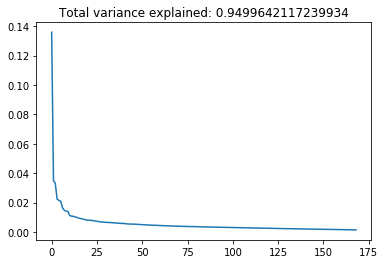

In [170]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [171]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

### Location Features Model

In [172]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm



%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [173]:
X_location = last_train[location_features]
Y = last_train.SalePrice

In [174]:
# dropping highly correlated variables
corr_matrix = X_location.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_location = X_location.drop(columns = to_drop, axis=1)

In [175]:
X_location = X_location.drop(columns = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl', 
                      'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandSlope_Sev',
                     'Neighborhood_Blueste', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill',
                     'Neighborhood_NWAmes','Neighborhood_SawyerW', 'LandSlope_Gtl', 'LandContour_Low',
                     'Neighborhood_SWISU', 'Neighborhood_ClearCr',
                     'LotShape_IR2','LotShape_IR1'], axis = 1)

In [176]:
X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_location, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [177]:
X_train_loc = sm.add_constant(X_train_loc)

results_location = sm.OLS(y_train_loc,X_train_loc).fit()
results_location.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     74.10
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          3.15e-213
Time:                        12:58:28   Log-Likelihood:                -14083.
No. Observations:                1168   AIC:                         2.822e+04
Df Residuals:                    1143   BIC:                         2.834e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  9.52e+04   9796.126      9.718      0.000     7.6e+04    1.14e+05
LotFrontage            575.2965     62.072      9.268      0.000     453.509     697.084
MSZoning_RL           3.516e+04   7570.321      4.645      0.000    2.03e+04       5e+04
MSZoning_RM            3.29e+04   8809.576      3.735      0.000    1.56e+04    5.02e+04
LandContour_HLS       3.069e+04   8884.921      3.454      0.001    1.33e+04    4.81e+04
LandContour_Lvl       1.574e+04   5481.074      2.872      0.004    4987.014    2.65e+04
LandSlope_Mod         2.028e+04   7020.962      2.889      0.004    6507.584    3.41e+04
Neighborhood_Blmngtn  2.354e+04   1.26e+04      1.870      0.062   -1155.860    4.82e+04
Neighborhood_BrDale  -6.124e+04   1.43e+04     -4.285      0.000   -8.93e+04   -3.32e+04
Neighborhood_BrkSide -5.475e+04   7358.678     -7.440      0.000   -6.92e+04   -4.03e+04
Neighborhood_CollgCr  9404.6088   4722.702      1.991      0.047     138.471    1.87e+04
Neighborhood_Crawfor  2.162e+04   7257.939      2.978      0.003    7374.724    3.59e+04
Neighborhood_Edwards -5.508e+04   5579.063     -9.873      0.000    -6.6e+04   -4.41e+04
Neighborhood_IDOTRR  -7.271e+04   9916.581     -7.332      0.000   -9.22e+04   -5.33e+04
Neighborhood_MeadowV -7.474e+04   1.38e+04     -5.420      0.000   -1.02e+05   -4.77e+04
Neighborhood_Mitchel -2.831e+04   7703.825     -3.675      0.000   -4.34e+04   -1.32e+04
Neighborhood_NAmes    -4.19e+04   4265.708     -9.822      0.000   -5.03e+04   -3.35e+04
Neighborhood_NoRidge  9.929e+04   8016.848     12.385      0.000    8.36e+04    1.15e+05
Neighborhood_NridgHt  9.352e+04   6080.173     15.382      0.000    8.16e+04    1.05e+05
Neighborhood_OldTown -5.143e+04   7182.043     -7.161      0.000   -6.55e+04   -3.73e+04
Neighborhood_Sawyer  -5.061e+04   6331.867     -7.993      0.000    -6.3e+04   -3.82e+04
Neighborhood_Somerst  6.315e+04   7801.166      8.095      0.000    4.78e+04    7.85e+04
Neighborhood_StoneBr  8.897e+04   9643.869      9.226      0.000    7.01e+04    1.08e+05
Neighborhood_Timber   4.753e+04   8203.640      5.793      0.000    3.14e+04    6.36e+04
Neighborhood_Veenker  3.374e+04   1.44e+04      2.349      0.019    5556.775    6.19e+04
==============================================================================
Omnibus:                      105.300   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.738
Skew:                           0.582   Prob(JB):                     3.48e-45
Kurtosis:                       4.689   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condit

In [178]:
X_test_loc = sm.add_constant(X_test_loc)

y_preds_loc = results_location.predict(X_test_loc)

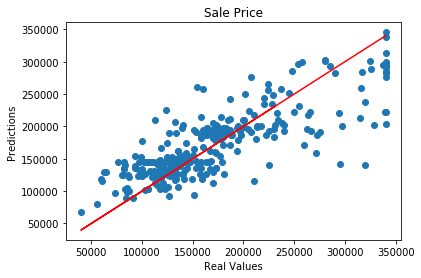

In [179]:
plt.scatter(y_test_loc, y_preds_loc)
plt.plot(y_test_loc, y_test_loc, color="red")
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Sale Price")
plt.show()

In [180]:
MAE_location = mean_absolute_error(y_test_loc, y_preds_loc)
MSE_location = mse(y_test_loc, y_preds_loc)
RMSE_location = rmse(y_test_loc, y_preds_loc)
MAPE_location = np.mean(np.abs((y_test_loc - y_preds_loc) / y_test_loc)) * 100

### Space features model

In [181]:
X_space = last_train[space_features]
Y = last_train.SalePrice

In [182]:
corr_matrix2 = X_space.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.95)]

In [183]:
X_space = X_space.drop(columns = to_drop2, axis=1)

In [184]:
X_space = X_space.drop(columns = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath' , 'HalfBath', 
                                 'TotRmsAbvGrd', '3SsnPorch', 'PoolArea', 'TotalPorch',
                                 'AreaByRoom',
                                 'GarageCars-Sq', 'TotalBsmtSF','MasVnrArea','BsmtHalfBath','ScreenPorch'] , axis=1)

In [185]:
X_train_space, X_test_space, y_train_space, y_test_space = train_test_split(X_space, Y, test_size = 0.2,
                                                                           random_state = 2)

In [186]:
X_train_space = sm.add_constant(X_train_space)

results_space = sm.OLS(y_train_space, X_train_space).fit()
results_space.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:58:29   Log-Likelihood:                -13630.
No. Observations:                1168   AIC:                         2.729e+04
Df Residuals:                    1151   BIC:                         2.738e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.403e+04   6748.630      8.006      0.000    4.08e+04    6.73e+04
LotArea           0.9462      0.287      3.292      0.001       0.382       1.510
BsmtFinSF1       -8.9981      4.121     -2.183      0.029     -17.084      -0.912
BsmtFinSF2      -31.6540      6.327     -5.003      0.000     -44.068     -19.240
BsmtUnfSF       -23.0089      4.407     -5.221      0.000     -31.656     -14.362
LowQualFinSF    -86.6024     18.045     -4.799      0.000    -122.007     -51.198
FullBath       1.201e+04   2345.037      5.123      0.000    7411.914    1.66e+04
BedroomAbvGr  -1.008e+04   1439.086     -7.005      0.000   -1.29e+04   -7257.310
KitchenAbvGr    -5.3e+04   4389.026    -12.076      0.000   -6.16e+04   -4.44e+04
GarageCars    -9285.8633   4460.832     -2.082      0.038    -1.8e+04    -533.589
GarageArea       22.3030      9.379      2.378      0.018       3.900      40.706
WoodDeckSF       27.3589      7.750      3.530      0.000      12.154      42.564
OpenPorchSF      40.8346     17.682      2.309      0.021       6.141      75.528
EnclosedPorch   -36.6946     14.799     -2.480      0.013     -65.731      -7.659
AllSF            63.1493      3.086     20.460      0.000      57.094      69.205
Bathrooms      5606.5709   1513.276      3.705      0.000    2637.483    8575.659
GarageCars-2   6926.3905   1076.091      6.437      0.000    4815.071    9037.710
==============================================================================
Omnibus:                      198.432   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1130.249
Skew:                          -0.651   Prob(JB):                    3.71e-246
Kurtosis:                       7.640   Cond. No.                     9.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
X_test_space = sm.add_constant(X_test_space)
y_preds_space = results_space.predict(X_test_space)

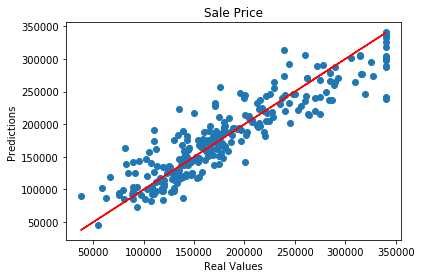

In [188]:
plt.scatter(y_test_space, y_preds_space)
plt.plot(y_test_space, y_test_space, color="red")
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Sale Price")
plt.show()

In [189]:
MAE_space = mean_absolute_error(y_test_space, y_preds_space)
MSE_space = mse(y_test_space, y_preds_space)
RMSE_space = rmse(y_test_space, y_preds_space)
MAPE_space = np.mean(np.abs((y_test_space - y_preds_space) / y_test_space)) * 100

### Building Features model

In [190]:
building_features_2 = ['YearBuilt', 'YearRemodAdd','Fireplaces','GarageYrBlt','RoofMatl_ClyTile','MasVnrType_Stone',
             'GarageType_2Types','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort'
             ,'GarageType_Detchd','GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf']

In [191]:
X_building = last_train[building_features_2]
Y = last_train.SalePrice

In [192]:
corr_matrix3 = X_building.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop3 = [column for column in upper.columns if any(upper[column] > 0.95)]

X_building = X_building.drop(columns = to_drop3, axis=1)

In [193]:
X_train_building, X_test_building, y_train_building, y_test_building = train_test_split(X_building, Y, test_size = 0.2,
                                                                           random_state = 2)

In [194]:
X_train_building = sm.add_constant(X_train_building)
results_building = sm.OLS(y_train_building, X_train_building).fit()
results_building.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          5.89e-233
Time:                        12:58:30   Log-Likelihood:                -14059.
No. Observations:                1168   AIC:                         2.815e+04
Df Residuals:                    1153   BIC:                         2.822e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.871e+06   2.07e+05     -9.045      0.000   -2.28e+06   -1.47e+06
YearBuilt            207.6552     79.407      2.615      0.009      51.857     363.454
YearRemodAdd         794.1181     77.719     10.218      0.000     641.631     946.605
Fireplaces          3.664e+04   2063.085     17.762      0.000    3.26e+04    4.07e+04
GarageYrBlt          339.4609     91.727      3.701      0.000     159.490     519.432
RoofMatl_ClyTile   -1.517e+05   4.15e+04     -3.659      0.000   -2.33e+05   -7.04e+04
MasVnrType_Stone    3.079e+04   4642.738      6.632      0.000    2.17e+04    3.99e+04
GarageType_2Types  -2.132e+05   6.23e+04     -3.423      0.001   -3.35e+05    -9.1e+04
GarageType_Attchd  -2.013e+05   5.99e+04     -3.361      0.001   -3.19e+05   -8.38e+04
GarageType_Basment -2.254e+05   6.05e+04     -3.727      0.000   -3.44e+05   -1.07e+05
GarageType_BuiltIn  -1.96e+05   6.02e+04     -3.254      0.001   -3.14e+05   -7.78e+04
GarageType_CarPort -2.276e+05   6.19e+04     -3.679      0.000   -3.49e+05   -1.06e+05
GarageType_Detchd  -2.108e+05   6.03e+04     -3.494      0.000   -3.29e+05   -9.24e+04
GarageFinish_Fin   -4.128e+05    1.2e+05     -3.435      0.001   -6.49e+05   -1.77e+05
GarageFinish_RFn   -4.243e+05    1.2e+05     -3.535      0.000    -6.6e+05   -1.89e+05
GarageFinish_Unf    -4.37e+05    1.2e+05     -3.653      0.000   -6.72e+05   -2.02e+05
==============================================================================
Omnibus:                       52.332   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.084
Skew:                           0.497   Prob(JB):                     8.97e-14
Kurtosis:                       3.497   Cond. No.                     2.48e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [195]:
X_test_building = sm.add_constant(X_test_building)
y_preds_building = results_building.predict(X_test_building)

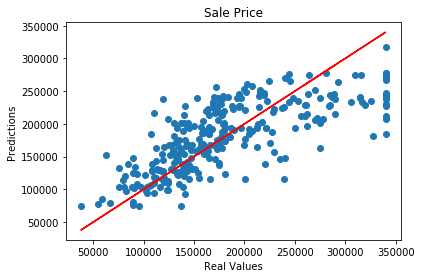

In [196]:
plt.scatter(y_test_building, y_preds_building)
plt.plot(y_test_building, y_test_building, color="red")
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Sale Price")
plt.show()

In [197]:
MAE_building = mean_absolute_error(y_test_building, y_preds_building)
MSE_building = mse(y_test_building, y_preds_building)
RMSE_building = rmse(y_test_building, y_preds_building)
MAPE_building = np.mean(np.abs((y_test_building - y_preds_building) / y_test_building)) * 100

### Quality Features model

In [198]:
quality_2 = ['OverallQual', 'OverallCond','Condition1_Artery','Condition1_PosN','Condition2_PosN',
            'BsmtQual_0','BsmtQual_4',
            'BsmtQual_Ex','BsmtCond_Gd','BsmtExposure_0',
            'BsmtExposure_4','FireplaceQu_3','BsmtQual',
            'ExterQual','OveralQualCond','GarageQualCond']

In [199]:
X_quality = last_train[quality_2]
Y = last_train.SalePrice

In [200]:
corr_matrix4 = X_quality.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix4.where(np.triu(np.ones(corr_matrix4.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop4 = [column for column in upper.columns if any(upper[column] > 0.95)]

X_quality = X_quality.drop(columns = to_drop4, axis=1)

In [201]:
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X_quality, Y,
                                                                                   test_size = 0.2, random_state = 3)

In [202]:
X_train_quality = sm.add_constant(X_train_quality)

results_quality = sm.OLS(y_train_quality, X_train_quality.astype(float)).fit()
results_quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     328.2
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:58:31   Log-Likelihood:                -13748.
No. Observations:                1168   AIC:                         2.752e+04
Df Residuals:                    1154   BIC:                         2.760e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.461e+05   9778.962    -14.941      0.000   -1.65e+05   -1.27e+05
OverallQual        1.265e+04    840.439     15.056      0.000     1.1e+04    1.43e+04
OverallCond       -3734.0056    782.258     -4.773      0.000   -5268.813   -2199.198
Condition1_Artery  -1.71e+04   5260.099     -3.250      0.001   -2.74e+04   -6776.028
Condition1_PosN    2.431e+04   8509.431      2.857      0.004    7612.319     4.1e+04
Condition2_PosN   -1.262e+05   2.41e+04     -5.226      0.000   -1.74e+05   -7.88e+04
BsmtQual_0          5.61e+04   8834.477      6.350      0.000    3.88e+04    7.34e+04
BsmtQual_4         -1.23e+04   2326.010     -5.287      0.000   -1.69e+04   -7733.313
BsmtQual_Ex        1.476e-11   3.55e-12      4.152      0.000    7.78e-12    2.17e-11
BsmtCond_Gd       -2.728e-12   8.03e-13     -3.397      0.001    -4.3e-12   -1.15e-12
BsmtExposure_0    -4753.7552   2305.051     -2.062      0.039   -9276.316    -231.195
BsmtExposure_4     1.964e+04   3602.661      5.450      0.000    1.26e+04    2.67e+04
FireplaceQu_3       1.39e+04   2347.756      5.919      0.000    9289.432    1.85e+04
BsmtQual           1.952e+04   2247.654      8.686      0.000    1.51e+04    2.39e+04
ExterQual          1.712e+04   2460.217      6.960      0.000    1.23e+04    2.19e+04
OveralQualCond     8919.6978    466.901     19.104      0.000    8003.628    9835.768
GarageQualCond       82.8618      5.682     14.584      0.000      71.714      94.010
==============================================================================
Omnibus:                       69.084   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.511
Skew:                           0.438   Prob(JB):                     1.12e-26
Kurtosis:                       4.299   Cond. No.                     8.99e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [203]:
X_test_quality = sm.add_constant(X_test_quality)
y_preds_quality = results_quality.predict(X_test_quality)

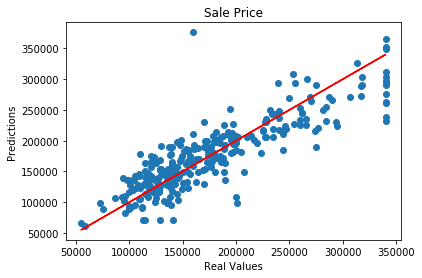

In [204]:
plt.scatter(y_test_quality, y_preds_quality)
plt.plot(y_test_quality, y_test_quality, color="red")
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Sale Price")
plt.show()

In [205]:
MAE_quality = mean_absolute_error(y_test_quality, y_preds_quality)
MSE_quality = mse(y_test_quality, y_preds_quality)
RMSE_quality = rmse(y_test_quality, y_preds_quality)
MAPE_quality = np.mean(np.abs((y_test_quality - y_preds_quality) / y_test_quality)) * 100

In [206]:
MSE_list = [MSE_location,
            MSE_space, 
            MSE_building, 
            MSE_quality]
MAE_list = [MAE_location, MAE_space, MAE_building, MAE_quality]
RMSE_list = [RMSE_location, RMSE_space, RMSE_building, RMSE_quality]

In [207]:
label1 = ['MSE(location)', 'MSE(space)', 'MSE(building)', 'MSE(quality)']
label2 = ['RMSE(location)', 'RMSE(space)', 'RMSE(building)', 'RMSE(quality)']

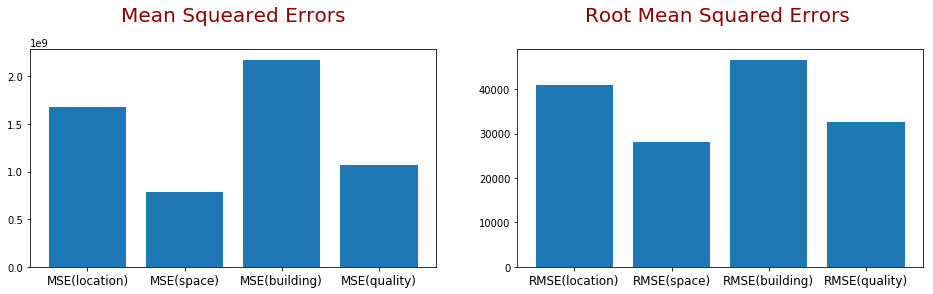

In [208]:
plt.figure(figsize = (16,4))
y_pos1 = np.arange(len(label1))
plt.subplot(121)
plt.bar(y_pos1, MSE_list)
plt.xticks(y_pos1, label1, size = 12)
plt.title('Mean Squeared Errors\n', size = 20, color = 'darkred')
y_pos2 = np.arange(len(label2))
plt.subplot(122)
plt.bar(y_pos2, RMSE_list)
plt.xticks(y_pos2, label2, size = 12)
plt.title('Root Mean Squared Errors \n', size = 20, color = 'darkred')
plt.show() 

In [209]:
Rsquared_adj = [results_location.rsquared_adj, results_space.rsquared_adj,
               results_building.rsquared_adj, results_quality.rsquared_adj]
label3 = ['Location Based', 'Space Based', 'Building Based', 'Quality Based']
Rsquared = [results_location.rsquared, results_space.rsquared,
               results_building.rsquared, results_quality.rsquared]

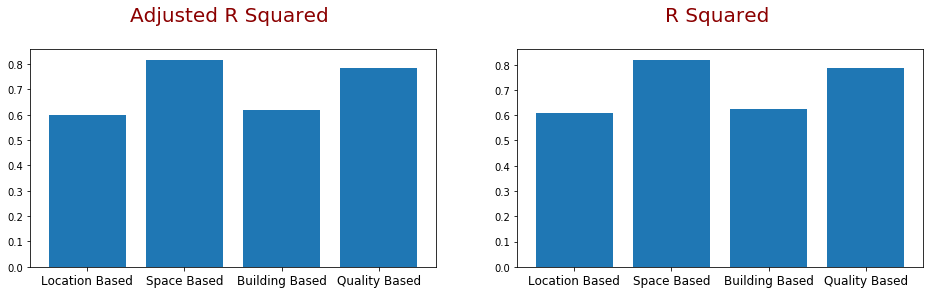

In [210]:
plt.figure(figsize = (16,4))
y_pos3 = np.arange(len(label3))
plt.subplot(121)
plt.bar(y_pos3, Rsquared_adj)
plt.xticks(y_pos3, label3, size = 12)
plt.title('Adjusted R Squared \n', size = 20, color = 'darkred')
plt.subplot(122)
plt.bar(y_pos3, Rsquared)
plt.xticks(y_pos3, label3, size = 12)
plt.title('R Squared \n', size = 20, color = 'darkred')
plt.show() 

### MODEL 1-2-3-4 (korelasyonlara bakılarak yapılan modeller)

In [211]:
# model 2 features
last_model_features = (X_quality.columns.tolist() + 
                       X_space.columns.tolist() + 
                       X_location.columns.tolist() + 
                       X_building.columns.tolist() +
                      ['SalePrice'])

In [212]:
last_train_new = last_train[last_model_features] # model 2

In [213]:
cor_1 = last_train.corr()
cor_list_1 = cor_1['SalePrice'].sort_values(ascending = False).index.tolist() # model 1

cor_2 = last_train_new.corr()
cor_list_2 = cor_2['SalePrice'].sort_values(ascending = False).index.tolist() # model 2

In [214]:
adjusted_old = []

for i in range(len(cor_list_1)):
    X_old_show = sm.add_constant(last_train[cor_list_1[1:i+1]])

    results_old_show = sm.OLS(last_train.SalePrice, X_old_show).fit()
    adjusted_old.append(results_old_show.rsquared_adj)
   
adjusted_new = []
for i in range(len(cor_list_2)):
    X_new_show = sm.add_constant(last_train[cor_list_2[1:i+1]])

    results_new_show = sm.OLS(last_train.SalePrice, X_new_show.astype(float)).fit()
    adjusted_new.append(results_new_show.rsquared_adj) 

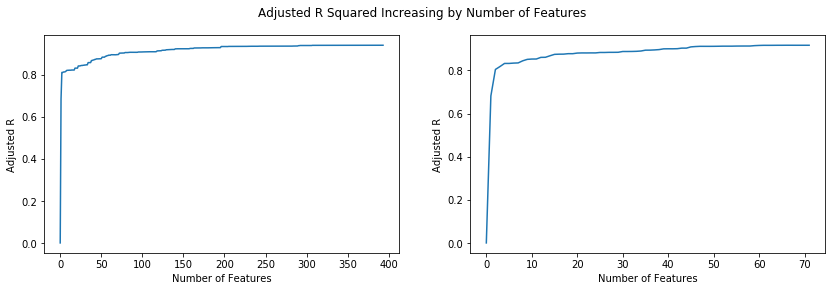

In [215]:
plt.figure(figsize=(14,4))
plt.suptitle('Adjusted R Squared Increasing by Number of Features')
plt.subplot(1,2,1)
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R')
plt.plot(adjusted_old)
plt.subplot(1,2,2)
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R')
plt.plot(adjusted_new)
plt.show()

In [216]:
X_train, X_test, y_train, y_test = train_test_split(last_train.drop(columns = ['SalePrice']), last_train.SalePrice,
                                                   test_size = 0.2,
                                                   random_state = 123)

In [217]:
X_zero_train = X_train
X_zero_test = X_test
y_zero_train = y_train
y_zero_test = y_test

X_old_train = X_train[cor_list_1[1:51]] # model 1
X_old_test = X_test[cor_list_1[1:51]] 
y_old_train = y_train
y_old_test = y_test

X_new_train = X_train[cor_list_2[1:21]] #model 2
X_new_test = X_test[cor_list_2[1:21]]
y_new_train = y_train
y_new_test = y_test


X_selected_train = X_train[['YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'RoofMatl_ClyTile', 'GarageType_2Types','LandSlope_Mod','Neighborhood_BrkSide','Neighborhood_Crawfor', 
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'AllSF','GarageCars-2',  'OverallQual','Condition2_PosN', 'BsmtQual_0', 
       'BsmtQual_4', 'BsmtQual_Ex', 'BsmtCond_Gd', 'BsmtExposure_4','BsmtQual', 'ExterQual', 'OveralQualCond',
       'GarageQualCond']]                                                # model 3
X_selected_test = X_test[['YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'RoofMatl_ClyTile', 'GarageType_2Types','LandSlope_Mod','Neighborhood_BrkSide','Neighborhood_Crawfor', 
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'AllSF','GarageCars-2',  'OverallQual','Condition2_PosN', 'BsmtQual_0', 
       'BsmtQual_4', 'BsmtQual_Ex', 'BsmtCond_Gd', 'BsmtExposure_4','BsmtQual', 'ExterQual', 'OveralQualCond',
       'GarageQualCond']]
y_selected_train = y_train
y_selected_test = y_test

X_selected_new_train = X_train[['YearBuilt', 'YearRemodAdd', 'Fireplaces','GarageQualCond', 'ExterQual', 'BsmtQual',
                          'OverallQual', 'LotArea']]                     # model 4
X_selected_new_test = X_test[['YearBuilt', 'YearRemodAdd', 'Fireplaces','GarageQualCond', 'ExterQual', 'BsmtQual',
                          'OverallQual', 'LotArea']]
y_selected_new_train = y_train
y_selected_new_test = y_test

In [218]:
print('Model 0, Number of Features: ' + str(X_zero_train.shape[1]),
     '\n','--'*15)                                             # model 0
print("X_zero_train : " + str(X_zero_train.shape))
print("X_zero_test : " + str(X_zero_test.shape))
print("y_zero_train : " + str(y_zero_train.shape))
print("y_zero_test : " + str(y_zero_test.shape), '\n')

print('Model 1, Number of Features: ' + str(X_old_train.shape[1]),
     '\n','--'*15)                                             # model 1
print("X_old_train : " + str(X_old_train.shape))
print("X_old_test : " + str(X_old_test.shape))
print("y_old_train : " + str(y_old_train.shape))
print("y_old_test : " + str(y_old_test.shape), '\n')

print('Model 2, Number of Features: ' + str(X_new_train.shape[1]),
     '\n','--'*15)                                             # model 2
print("X_new_train : " + str(X_new_train.shape))
print("X_new_test : " + str(X_new_test.shape))
print("y_new_train : " + str(y_new_train.shape))
print("y_new_test : " + str(y_new_test.shape))

print('Model 3, Number of Features: ' + str(X_selected_train.shape[1]),
     '\n','--'*15)                                             # model 3
print("X_selected_train : " + str(X_selected_train.shape))
print("X_selected_test : " + str(X_selected_test.shape))
print("y_selected_train : " + str(y_selected_train.shape))
print("y_selected_test : " + str(y_selected_test.shape), '\n')

print('Model 4, Number of Features: ' + str(X_selected_new_train.shape[1]),
     '\n','--'*15)                                             # model 4
print("X_selected_new_train : " + str(X_selected_new_train.shape))
print("X_selected_new_test : " + str(X_selected_new_test.shape))
print("y_selected_new_train : " + str(y_selected_new_train.shape))
print("y_selected_new_test : " + str(y_selected_new_test.shape))

Model 0, Number of Features: 398 
 ------------------------------
X_zero_train : (1168, 398)
X_zero_test : (292, 398)
y_zero_train : (1168,)
y_zero_test : (292,) 

Model 1, Number of Features: 50 
 ------------------------------
X_old_train : (1168, 50)
X_old_test : (292, 50)
y_old_train : (1168,)
y_old_test : (292,) 

Model 2, Number of Features: 20 
 ------------------------------
X_new_train : (1168, 20)
X_new_test : (292, 20)
y_new_train : (1168,)
y_new_test : (292,)
Model 3, Number of Features: 34 
 ------------------------------
X_selected_train : (1168, 34)
X_selected_test : (292, 34)
y_selected_train : (1168,)
y_selected_test : (292,) 

Model 4, Number of Features: 8 
 ------------------------------
X_selected_new_train : (1168, 8)
X_selected_new_test : (292, 8)
y_selected_new_train : (1168,)
y_selected_new_test : (292,)


In [219]:
# Linear regression X_zero set

X_zero_train = sm.add_constant(X_zero_train)
results_zero = sm.OLS(y_zero_train, X_zero_train.astype(float)).fit()
y_preds_zero_train = results_zero.predict(X_zero_train)

X_zero_test = sm.add_constant(X_zero_test, has_constant='add') 
y_preds_zero_test = results_zero.predict(X_zero_test)

results_zero_test = sm.OLS(y_zero_test, X_zero_test.astype(float)).fit() # test r

In [220]:
# Linear regression X_old set

X_old_train = sm.add_constant(X_old_train)
results_old = sm.OLS(y_old_train, X_old_train).fit()
y_preds_old_train = results_old.predict(X_old_train)

X_old_test = sm.add_constant(X_old_test)
y_preds_old_test = results_old.predict(X_old_test)

results_old_test = sm.OLS(y_old_test, X_old_test).fit() # test r
# results_old_test.rsquared_adj

In [221]:
# Linear regression X_new set

X_new_train = sm.add_constant(X_new_train)
results_new = sm.OLS(y_new_train, X_new_train).fit()
y_preds_new_train = results_new.predict(X_new_train)

X_new_test = sm.add_constant(X_new_test)
y_preds_new_test = results_new.predict(X_new_test)

results_new_test = sm.OLS(y_new_test, X_new_test).fit() # test r
# results_new_test.rsquared_adj

In [222]:
# Linear regression X_selected set

X_selected_train = sm.add_constant(X_selected_train)
results_selected = sm.OLS(y_selected_train, X_selected_train).fit()
y_preds_selected_train = results_selected.predict(X_selected_train)

X_selected_test = sm.add_constant(X_selected_test)
y_preds_selected_test = results_selected.predict(X_selected_test)

results_selected_test = sm.OLS(y_selected_test, X_selected_test).fit() # test r
# results_selected_test.rsquared_adj

In [223]:
# Linear regression X_selected_new set

X_selected_new_train = sm.add_constant(X_selected_new_train)
results_selected_new = sm.OLS(y_selected_new_train, X_selected_new_train).fit()
y_preds_selected_new_train = results_selected_new.predict(X_selected_new_train)

X_selected_new_test = sm.add_constant(X_selected_new_test)
y_preds_selected_new_test = results_selected_new.predict(X_selected_new_test)

results_selected_new_test = sm.OLS(y_selected_new_test, X_selected_new_test).fit() # test r
# results_selected_new_test.rsquared_adj

### Modellerimiz neler?

* model 0 : bütün değişkenler dahil edildi
* model 1 : yeni değişkenler türetildikten sonra bütün değişkenlerin korelasyonlarına bakıldı. En yüksek 50'si artan ayarlanmış R kare grafiğine bakılarak seçildi
* model 2 : 4 ayrı bina özellik kategorisi belirlendi. Bunlardan 4 ayrı model oluşturuldu. Bu 4 modelin herbirinden anlamlı değişkenler seçildi. Bu değişkenlerin hedefle korelasyonlarına bakıldı. En yüksek ilk 20'si artan ayarlanmış R kare grafiğine bakılarak seçildi.
* model 3 : 4 ayrı kategoriden seçilen anlamlı değişkenlerle kurulan modelden, yeni modelde anlamsız olanlar çıkarılarak kuruldu.
* model 4 : Model 3 üzerinde manuel olarak değişken azaltılarak, az değişkenli bir modelin performanına göz atmak için kuruldu.
* model 5 : Hata grafiklerinde tespit edilen heteroscedasticity problemini çözmek adına yapıldı. Model 3 ten farkı, hedef değişkende log dönüşümü yapıldı.
* model 6 : Model 5'te çözülemeyen heteroscedasticity problemini çözebilmek için, bu sefer hedef değişkenin winsorize edilmemiş hali kullanıldı. Hedef değişkende log dönüşümü yapıldı. Hata dağılımındaki anormallik düzeldi.

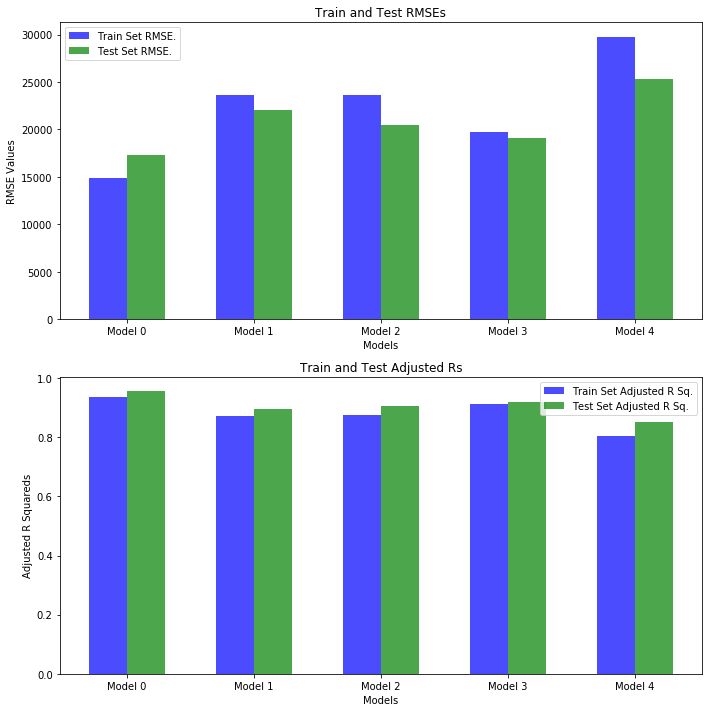

In [224]:
model_labels = ['Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4']

model_adjusted_train = [results_zero.rsquared_adj,
                        results_old.rsquared_adj,
                       results_new.rsquared_adj,
                       results_selected.rsquared_adj,
                       results_selected_new.rsquared_adj]
model_adjusted_test = [results_zero_test.rsquared_adj,
                       results_old_test.rsquared_adj,
                       results_new_test.rsquared_adj,
                       results_selected_test.rsquared_adj,
                       results_selected_new_test.rsquared_adj]

model_rmse_train = [rmse(y_zero_train, y_preds_zero_train), 
                    rmse(y_old_train, y_preds_old_train),
                    rmse(y_new_train, y_preds_new_train),
                    rmse(y_selected_train, y_preds_selected_train),
                    rmse(y_selected_new_train, y_preds_selected_new_train)]

model_rmse_test =  [rmse(y_zero_test, y_preds_zero_test), 
                    rmse(y_old_test, y_preds_old_test),
                    rmse(y_new_test, y_preds_new_test),
                    rmse(y_selected_test, y_preds_selected_test),
                    rmse(y_selected_new_test, y_preds_selected_new_test)]

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7
 
rects1 = plt.bar(index, model_rmse_train, bar_width,
alpha=opacity,
color='b',
label='Train Set RMSE.')
 
rects2 = plt.bar(index + bar_width, model_rmse_test, bar_width,
alpha=opacity,
color='g',
label='Test Set RMSE.')
 
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title('Train and Test RMSEs')
plt.xticks(index + bar_width/2, ('Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4'))
plt.legend()

plt.subplot(2,1,2)
rects1 = plt.bar(index, model_adjusted_train, bar_width,
alpha=opacity,
color='b',
label='Train Set Adjusted R Sq.')
 
rects2 = plt.bar(index + bar_width, model_adjusted_test, bar_width,
alpha=opacity,
color='g',
label='Test Set Adjusted R Sq.')
 
plt.xlabel('Models')
plt.ylabel('Adjusted R Squareds')
plt.title('Train and Test Adjusted Rs')
plt.xticks(index + bar_width/2, ('Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4'))
plt.legend()

plt.tight_layout()
plt.show()

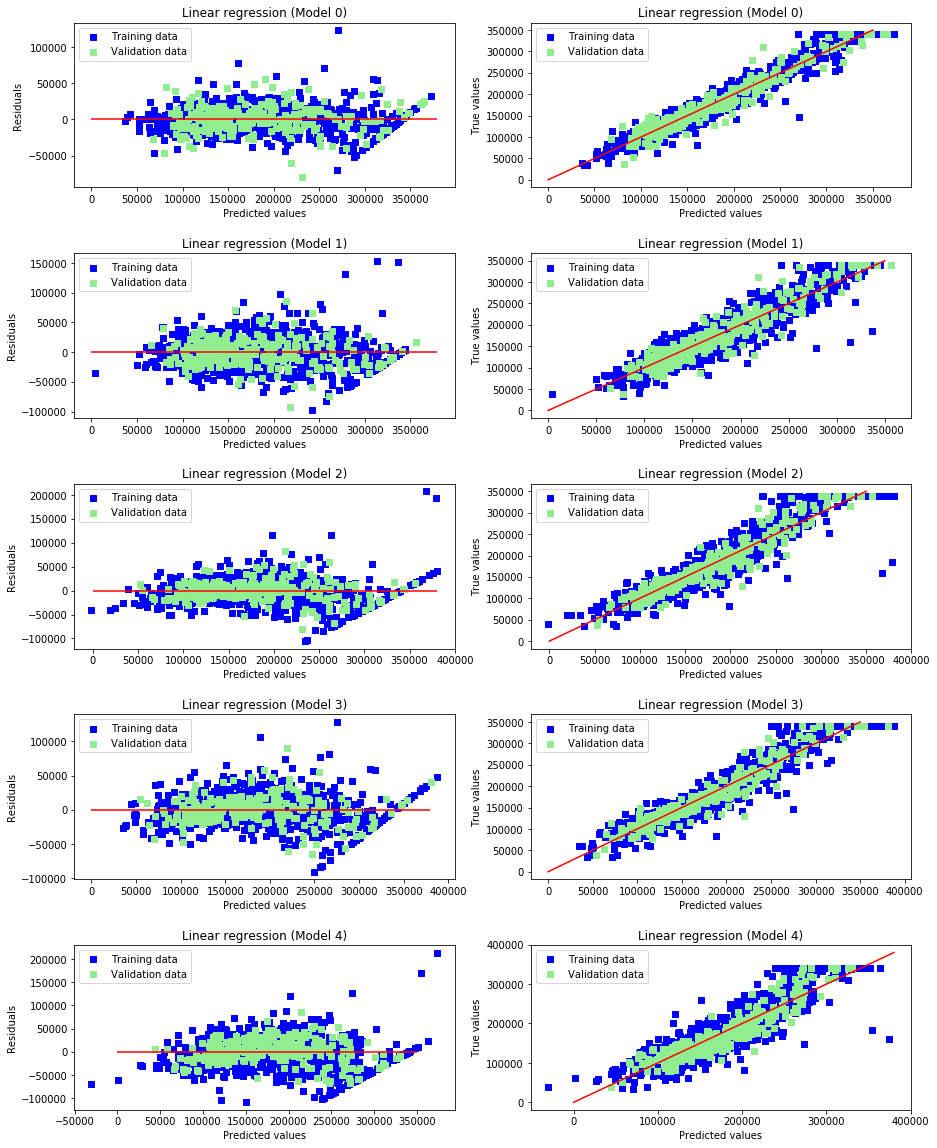

In [225]:
# Plot residuals

plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(5,2,1)
plt.scatter(y_preds_zero_train, y_preds_zero_train - y_zero_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_zero_test, y_preds_zero_test - y_zero_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 0)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,2)
plt.scatter(y_preds_zero_train, y_zero_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_zero_test, y_zero_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 0)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")


plt.subplot(5,2,3)
plt.scatter(y_preds_old_train, y_preds_old_train - y_old_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_old_test, y_preds_old_test - y_old_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 1)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,4)
plt.scatter(y_preds_old_train, y_old_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_old_test, y_old_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 1)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

plt.subplot(5,2,5)
plt.scatter(y_preds_new_train, y_preds_new_train - y_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_new_test, y_preds_new_test - y_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 2)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,6)
plt.scatter(y_preds_new_train, y_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_new_test, y_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 2)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

plt.subplot(5,2,7)
plt.scatter(y_preds_selected_train, y_preds_selected_train - y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_preds_selected_test - y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,8)
plt.scatter(y_preds_selected_train, y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

plt.subplot(5,2,9)
plt.scatter(y_preds_selected_new_train, y_preds_selected_new_train - y_selected_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_new_test, y_preds_selected_new_test - y_selected_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 4)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 350000, color = "red")

plt.subplot(5,2,10)
plt.scatter(y_preds_selected_new_train, y_selected_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_new_test, y_selected_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 4)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 380000], [0, 380000], c = "red")
plt.show()

### Model 3 iyileştirme- model 5 ve model 6

In [228]:
import matplotlib

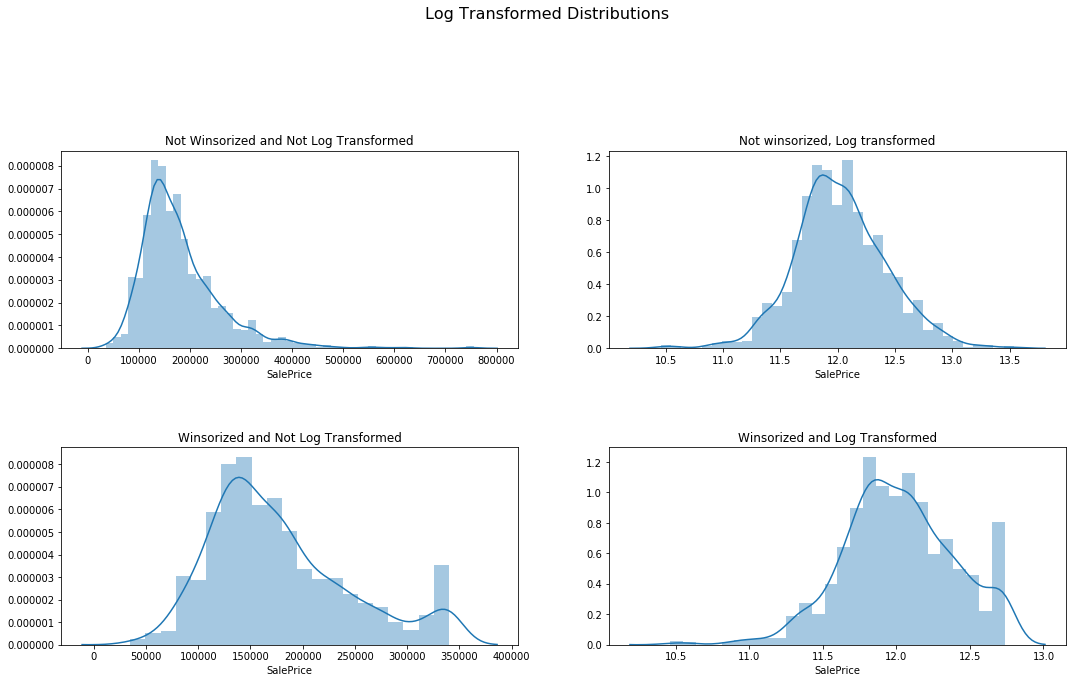

In [242]:
plt.figure(figsize = (18,20))
plt.subplot(4,2,1)
plt.title('Not Winsorized and Not Log Transformed')
sns.distplot(train_1["SalePrice"])
plt.subplot(4,2,2)
plt.title('Not winsorized, Log transformed')
sns.distplot(np.log1p(train_1["SalePrice"]))
plt.subplot(4,2,3)
plt.title('Winsorized and Not Log Transformed')
sns.distplot(last_train['SalePrice'])
plt.subplot(4,2,4)
plt.title('Winsorized and Log Transformed')
sns.distplot(np.log1p(last_train["SalePrice"]))
plt.suptitle('Log Transformed Distributions', size = 16)
plt.subplots_adjust(hspace = 0.5)
plt.show()

### Model 3 teki değişkenlerle, hedef değişkeni log dönüşümüne tabi tutarak model 5 i kurduk.
### model 5

In [230]:
# model 3 feature set, target variable, sale price is logged

X_selected_train_log = X_train[['YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'RoofMatl_ClyTile', 'GarageType_2Types','LandSlope_Mod','Neighborhood_BrkSide','Neighborhood_Crawfor', 
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'AllSF','GarageCars-2',  'OverallQual','Condition2_PosN', 'BsmtQual_0', 
       'BsmtQual_4', 'BsmtQual_Ex', 'BsmtCond_Gd', 'BsmtExposure_4','BsmtQual', 'ExterQual', 'OveralQualCond',
       'GarageQualCond']]                                               
X_selected_test_log = X_test[['YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'RoofMatl_ClyTile', 'GarageType_2Types','LandSlope_Mod','Neighborhood_BrkSide','Neighborhood_Crawfor', 
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'AllSF','GarageCars-2',  'OverallQual','Condition2_PosN', 'BsmtQual_0', 
       'BsmtQual_4', 'BsmtQual_Ex', 'BsmtCond_Gd', 'BsmtExposure_4','BsmtQual', 'ExterQual', 'OveralQualCond',
       'GarageQualCond']]
y_selected_train_log = np.log1p(y_train)
y_selected_test_log = np.log1p(y_test)

In [231]:
# Linear regression X_selected set

X_selected_train_log = sm.add_constant(X_selected_train_log)
results_selected_log = sm.OLS(y_selected_train_log, X_selected_train_log).fit()
y_preds_selected_train_log = results_selected_log.predict(X_selected_train_log)

X_selected_test_log = sm.add_constant(X_selected_test_log)
y_preds_selected_test_log = results_selected_log.predict(X_selected_test_log)

results_selected_test_log = sm.OLS(y_selected_test_log, X_selected_test_log).fit() # test r


X_selected_train_one = sm.add_constant(X_selected_train)
results_selected_one = sm.OLS(np.log1p(y_one_train) , X_selected_train_one).fit()
y_preds_selected_train_one = results_selected_one.predict(X_selected_train_one)

X_selected_test_one = sm.add_constant(X_selected_test)
y_preds_selected_test_one = results_selected_one.predict(X_selected_test)

results_selected_test_one = sm.OLS(np.log1p(y_one_test), X_selected_test_one).fit()

### Yine model 3'teki değişkenlerle hedef değişkeni loglayarak model 6 yı kurduk. Ancak bu modelde hedef değişken SalePrice'ın winsorize edilmemiş halini kullandık.
### Model 6

In [236]:
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(train_1.drop(columns = ['SalePrice']),
                                                                   train_1.SalePrice,
                                                                   test_size = 0.2,
                                                                   random_state = 123) 

In [237]:
# Linear regression X_selected set

X_selected_train_one = sm.add_constant(X_selected_train)
results_selected_one = sm.OLS(np.log1p(y_one_train) , X_selected_train_one).fit()
y_preds_selected_train_one = results_selected_one.predict(X_selected_train_one)

X_selected_test_one = sm.add_constant(X_selected_test)
y_preds_selected_test_one = results_selected_one.predict(X_selected_test)

results_selected_test_one = sm.OLS(np.log1p(y_one_test), X_selected_test_one).fit()

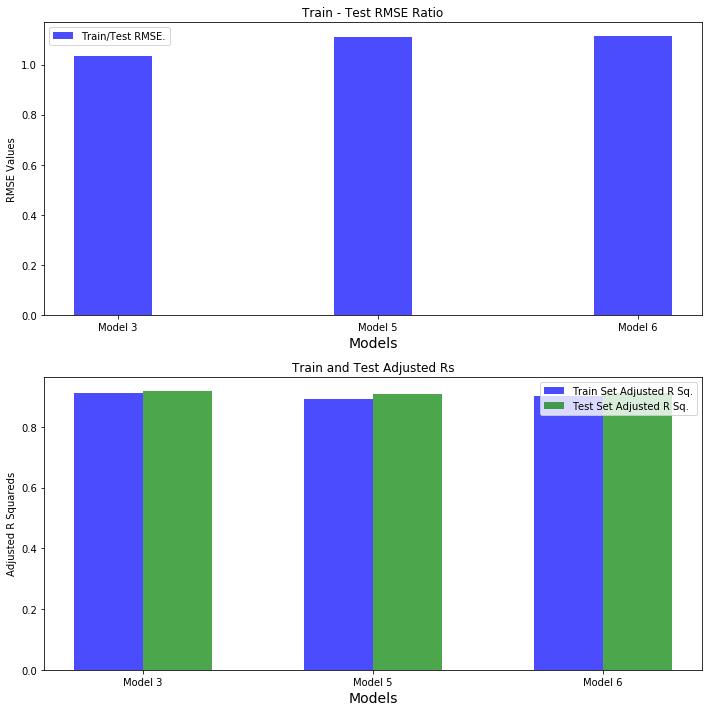

In [290]:
model_labels = ['Model 3', 'Model 5', 'Model 6']

mod_adj_train = [results_selected.rsquared_adj,
                 results_selected_log.rsquared_adj,
                 results_selected_one.rsquared_adj]


mod_adj_test = [results_selected_test.rsquared_adj,
                results_selected_test_log.rsquared_adj,
                results_selected_test_one.rsquared_adj]

mod_rmse = [rmse(y_selected_train, y_preds_selected_train)/rmse(y_selected_test, y_preds_selected_test),
            rmse(y_selected_train_log, y_preds_selected_train_log)/rmse(y_selected_test_log, y_preds_selected_test_log),
            rmse(np.log1p(y_train), y_preds_selected_train_one)/rmse(np.log1p(y_test), y_preds_selected_test_one)]


n_groups = 3
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)

 
rects1 = plt.bar(index, mod_rmse, bar_width,
alpha=opacity,
color='b',
label='Train/Test RMSE.')
 
# rects2 = plt.bar(index + bar_width, mod_rmse_test, bar_width,
# alpha=opacity,
# color='g',
# label='Test Set RMSE.')
 
plt.xlabel('Models', size = 14)
plt.ylabel('RMSE Values')
plt.title('Train - Test RMSE Ratio')
plt.xticks(index + bar_width/16, ('Model 3', 'Model 5', 'Model 6'))
plt.legend()

plt.subplot(2,1,2)
rects1 = plt.bar(index, mod_adj_train, bar_width,
alpha=opacity,
color='b',
label='Train Set Adjusted R Sq.')
 
rects2 = plt.bar(index + bar_width, mod_adj_test, bar_width,
alpha=opacity,
color='g',
label='Test Set Adjusted R Sq.')
 
plt.xlabel('Models',size = 14)
plt.ylabel('Adjusted R Squareds')
plt.title('Train and Test Adjusted Rs')
plt.xticks(index + bar_width/2, ('Model 3', 'Model 5', 'Model 6'))
plt.legend()
plt.subplots_adjust(hspace = 0.4)

plt.tight_layout()
plt.show()

Yukarıdaki grafikler, Model 3-5-6 arasında RMSE lerin büyüklüğü ve adjusted r kare ile ilgili bilgi veriyor.

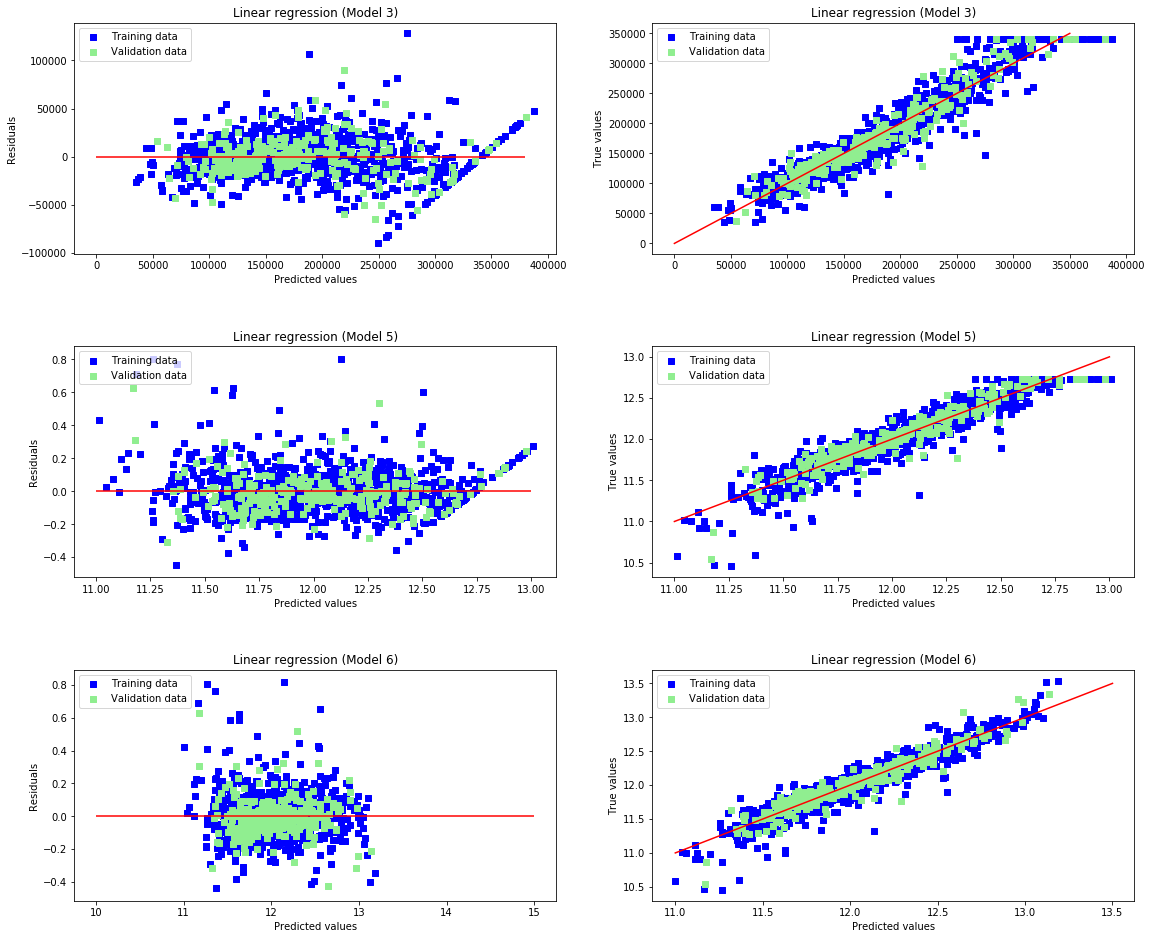

In [292]:
plt.figure(figsize = (19,34))


plt.subplot(6,2,1)
plt.scatter(y_preds_selected_train, y_preds_selected_train - y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_preds_selected_test - y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(6,2,2)
plt.scatter(y_preds_selected_train, y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")


plt.subplot(6,2,3)
plt.scatter(y_preds_selected_train_log, y_preds_selected_train_log - y_selected_train_log, 
            c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_log, y_preds_selected_test_log - y_selected_test_log, 
            c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 5)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11, xmax = 13, color = "red")

plt.subplot(6,2,4)
plt.scatter(y_preds_selected_train_log, y_selected_train_log, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_log, y_selected_test_log, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 5)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([11, 13], [11, 13], c = "red")

plt.subplot(6,2,5)
plt.scatter(y_preds_selected_train_one, y_preds_selected_train_one - np.log1p(y_one_train), 
            c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_one, y_preds_selected_test_one - np.log1p(y_one_test), 
            c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 6)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 15, color = "red")

plt.subplot(6,2,6)
plt.scatter(y_preds_selected_train_one, np.log1p(y_one_train), c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_one, np.log1p(y_one_test), c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 6)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([11, 13.5], [11, 13.5], c = "red")

plt.subplots_adjust(hspace = 0.4)
plt.show()